**Initial setup**

General purpose imports

In [1]:
import pandas as pd
#from sklearn.model_selection import train_test_split

Imports for exploratory data analysis only:

In [2]:
import matplotlib.pyplot as plt, seaborn as sns, folium
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from wordcloud import WordCloud, STOPWORDS

Basic settings

In [3]:
seed = 42
#sample_n = 1000
sns.set(style = 'ticks') # 'darkgrid')
palette = {'negative': 'red', 'neutral': 'orange', 'positive': 'chartreuse'} # 'cyan' 'magenta'

Data import

In [4]:
import os
#os.chdir('C:/Users/PK/OneDrive/Documents/NLP/_facts_Kaggle_Twitter_airline_sentiment')
df0 = pd.read_csv('./data/Tweets.csv')

**Exploratory data analysis**

Basics

In [5]:
print(df0.shape, df0.dtypes, sep = '\n')

(14640, 15)
tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object


In [6]:
#df0.describe
#for x in df0:
#    print(x, df0[x].head(), sep = '\n')
print(df0.head())

             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


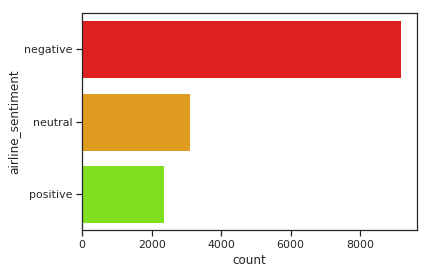

In [7]:
print(df0.airline_sentiment.value_counts())
ax = sns.countplot(y = 'airline_sentiment', data = df0, order = palette.keys(), palette = palette)

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64


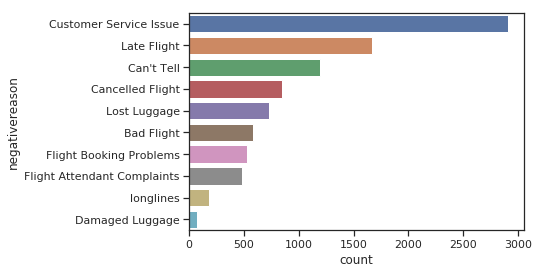

In [8]:
print(df0.negativereason.value_counts())
ax0 = sns.countplot(y = 'negativereason', data = df0, order = df0.negativereason.value_counts().index)

In [9]:
print(df0[['airline_sentiment', 'airline_sentiment_gold', 'negativereason', 'negativereason_gold', 'tweet_id']].fillna('-').groupby(['airline_sentiment', 'airline_sentiment_gold', 'negativereason', 'negativereason_gold']).agg('count'))

                                                                                                               tweet_id
airline_sentiment airline_sentiment_gold negativereason              negativereason_gold                               
negative          -                      Bad Flight                  -                                              579
                                         Can't Tell                  -                                             1186
                                         Cancelled Flight            -                                              843
                                         Customer Service Issue      -                                             2897
                                         Damaged Luggage             -                                               74
                                         Flight Attendant Complaints -                                              480
                                        

Top accounts
airline_sentiment  negative  neutral  positive  All
name                                               
All                     311      123        39  473
JetBlueNews               1       57         5   63
kbosspotter               4       22         6   32
_mhertz                  27        2         0   29
otisday                  28        0         0   28
throthra                 24        2         1   27
weezerandburnie          23        0         0   23
rossj987                 23        0         0   23
GREATNESSEOA             18        2         2   22
MeeestarCoke             15        3         4   22
scoobydoo9749            18        3         0   21
jasemccarty              15        3         2   20
georgetietjen             4       10         5   19
ElmiraBudMan             18        1         0   19
flemmingerin             11        5         3   19
chagaga2013              18        0         0   18
thomashoward88           15        3         0   18

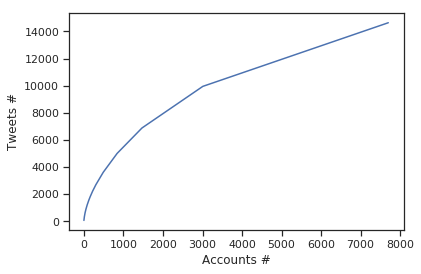

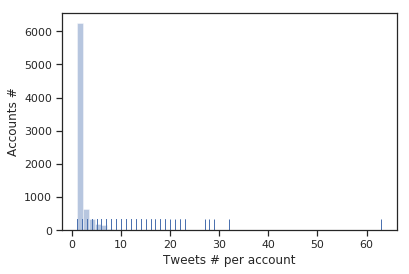

In [10]:
## “What's in a name”
#print(df0.name.value_counts())
chart1, ax1 = plt.subplots()
sns.lineplot(data = df0.name.value_counts().cumsum().reset_index(drop = True))
ax1.set(xlabel = 'Accounts #', ylabel = 'Tweets #')
#sns.barplot(x = 'index', y = 'name', data = df0.name.value_counts().head(200).reset_index())
chart2, ax2 = plt.subplots()
sns.distplot(df0.name.value_counts(), kde = False, rug = True, axlabel = 'Tweets # per account')
ax2.set(ylabel = 'Accounts #')
df6 = df0.name.value_counts().head(20).reset_index().merge(df0, left_on = 'index', right_on = 'name', suffixes = ('_x', '')).sort_values('name_x', ascending = False)
df6 = pd.crosstab(df6.name, df6.airline_sentiment, margins = True).sort_values('All', ascending = False)
print('Top accounts', df6, sep = '\n')#.to_string)
del(df6)

Temporal analysis

In [11]:
df0['tweet_created'] = pd.to_datetime(df0['tweet_created'], utc = True, errors = 'coerce')
df0['UTC_day_of_week'] = df0['tweet_created'].dt.dayofweek
df0['UTC_date'] = df0['tweet_created'].dt.date

/home/pk/anaconda3/envs/nlp37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/pk/anaconda3/envs/nlp37/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


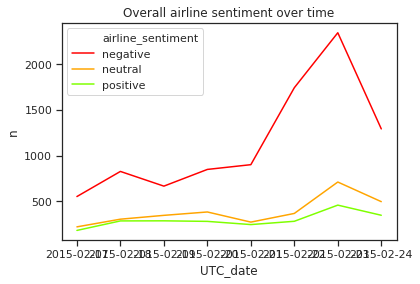

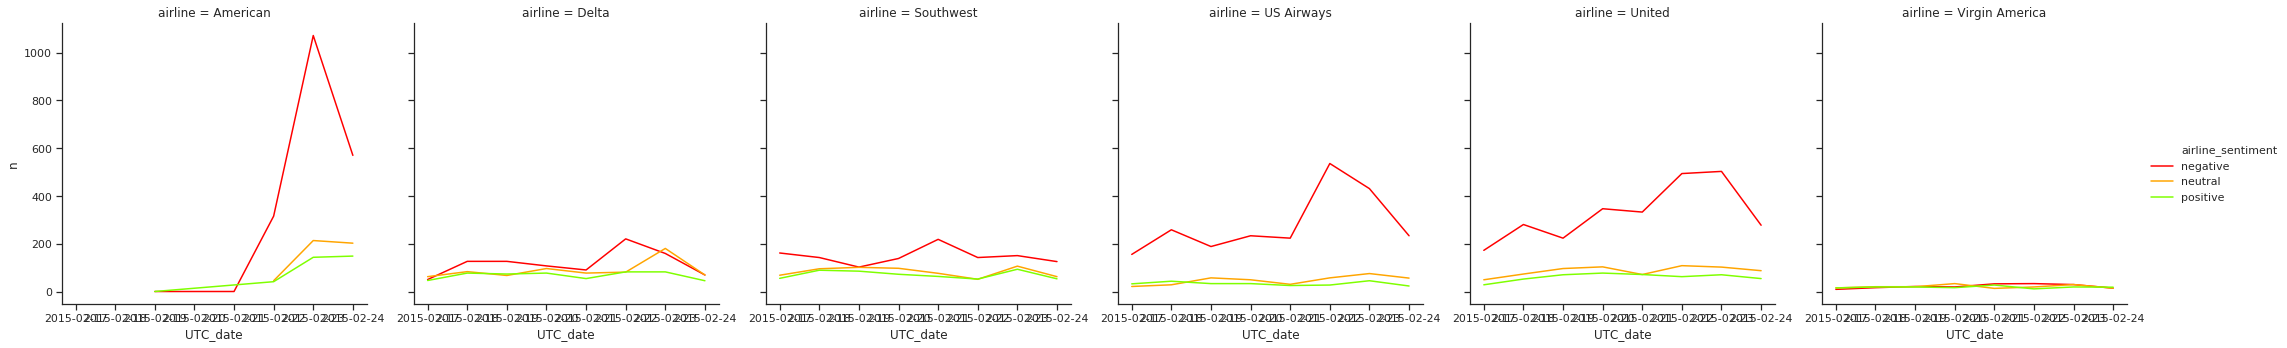

In [12]:
df3 = df0[['UTC_date', 'airline_sentiment', 'airline']]
df3['n'] = 1
df4 = df3.groupby(['UTC_date', 'airline_sentiment']).agg('count').reset_index()
chart3, ax3 = plt.subplots()
sns.lineplot(x = 'UTC_date', y = 'n', data = df4, hue = 'airline_sentiment', hue_order = palette.keys(), palette = palette)
ax3.set_title('Overall airline sentiment over time')
sns.relplot(col = 'airline', x = 'UTC_date', y = 'n', data = df3.groupby(['airline', 'UTC_date', 'airline_sentiment']).agg('count').reset_index(), kind = 'line', hue = 'airline_sentiment', hue_order = palette.keys(), palette = palette)
del(df3)

Location analysis

In [13]:
v1 = df0['tweet_coord'].notna()
df1 = pd.DataFrame()
df1[['lat', 'lon']] = pd.DataFrame(df0['tweet_coord'][v1].apply(lambda x: [pd.eval(x)[0], pd.eval(x)[1]]).values.tolist(), index = df0.index[v1])
df0 = df0.merge(df1, left_index = True, right_index = True, how = 'left', validate = '1:1') # df0.join(df1, how = 'left')

for x in ['tweet_coord', 'tweet_location', 'user_timezone']:
    df0[x+ '_f'] = 0
    df0[x + '_f'][df0[x].notna() & (df0[x] != '[0.0, 0.0]')] = 1
    print(df0[x + '_f'].value_counts())

#sns.set(style = 'darkgrid')
#sns.scatterplot(x = 'lon', y = 'lat', hue = 'airline_sentiment', data = df0[v1])

0    13785
1      855
Name: tweet_coord_f, dtype: int64
1    9907
0    4733
Name: tweet_location_f, dtype: int64
1    9820
0    4820
Name: user_timezone_f, dtype: int64


/home/pk/anaconda3/envs/nlp37/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
df2 = df0[['airline_sentiment', 'lat', 'lon', 'airline', 'text']][v1].round(decimals = 0)
df2['n'] = 1
df2['text'] = df2['airline'] + ' - ' + df2['text']
df2.drop(columns = 'airline', inplace = True)
df2 = df2.groupby(['airline_sentiment', 'lat', 'lon']).agg({'n': 'count', 'text': list}).reset_index()
df2['n'] = df2['n'].astype(float)

In [15]:
m = folium.Map(location = [20, 0], tiles = 'OpenStreetMap', zoom_start = 2.5) # 'Mapbox Bright' 'Mapbox Control Room'
for i in df2.index:
    folium.CircleMarker(
        location = [df2.loc[i, 'lat'], df2.loc[i, 'lon']],
        popup = df2.loc[i, 'text'],
        radius = df2.loc[i, 'n'],
        color = palette[df2.loc[i, 'airline_sentiment']],
        fill = True,
        fill_color = palette[df2.loc[i, 'airline_sentiment']]
    ).add_to(m)
m

Scatterplot matrix of numeric and quasi-numeric variables

/home/pk/anaconda3/envs/nlp37/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/pk/anaconda3/envs/nlp37/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/pk/anaconda3/envs/nlp37/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/pk/anaconda3/envs/nlp37/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


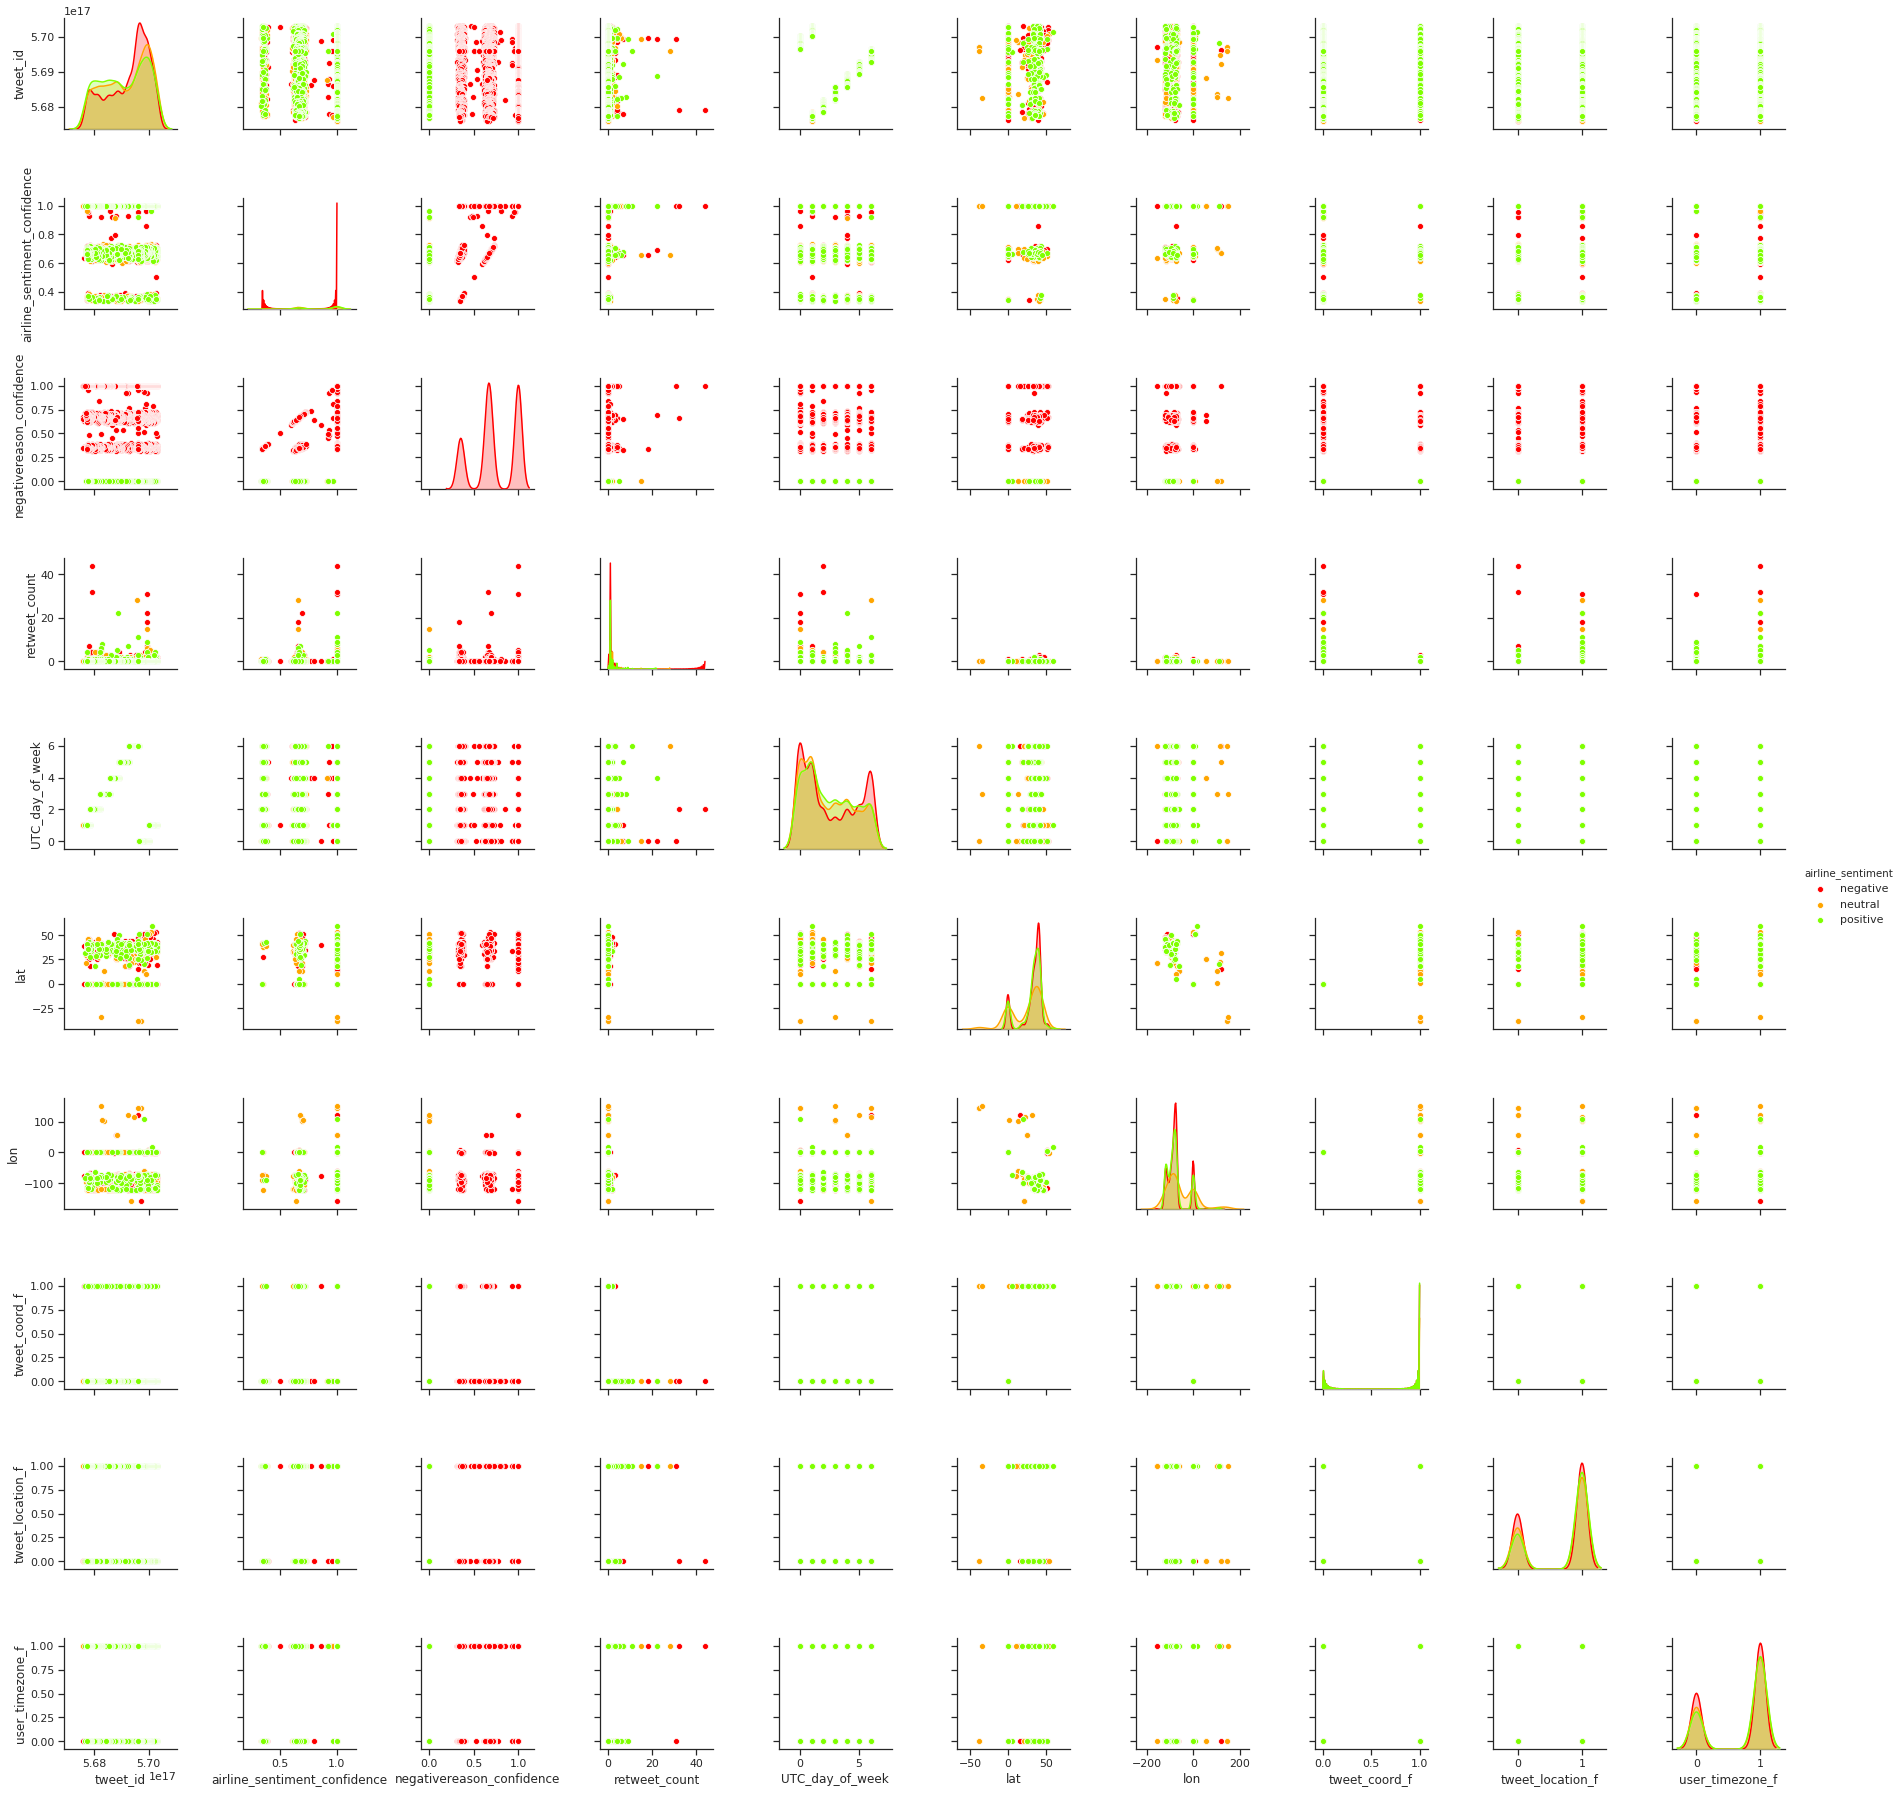

In [16]:
#sns.pairplot(df0.sort_values('airline_sentiment'))
sns.pairplot(df0, hue = 'airline_sentiment', hue_order = palette.keys(), palette = palette)

In [17]:
for x in ['tweet_coord_f', 'tweet_location_f', 'user_timezone_f']:
    df0[x] = df0[x].astype('category')

Analysis of numeric variables

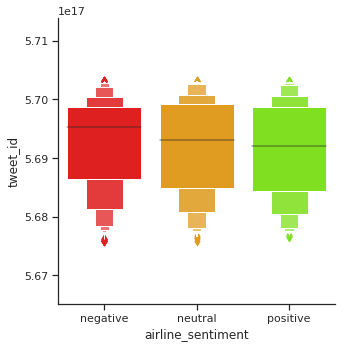

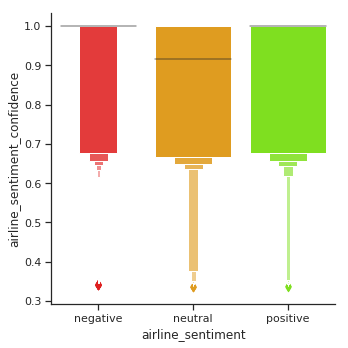

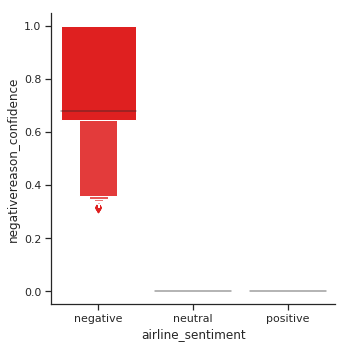

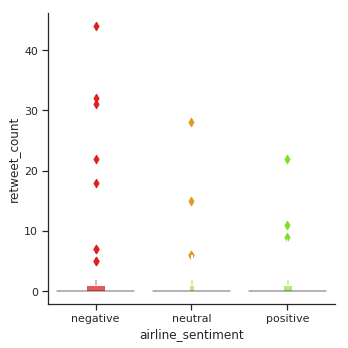

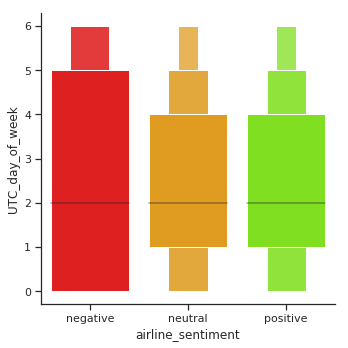

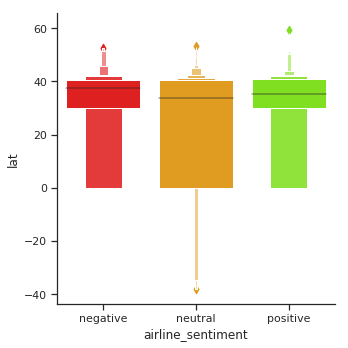

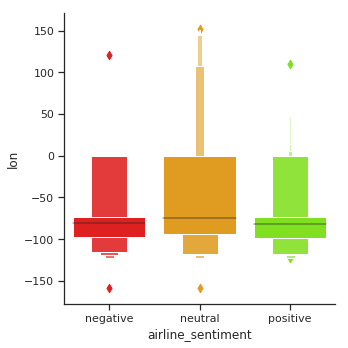

In [18]:
numeric_variables = list(df0.select_dtypes(include = 'number'))
#numeric_variables = list(df0.select_dtypes(include = ['number', 'datetimetz']))
#sample_df, _ = train_test_split(df0, train_size = sample_n, random_state = seed, stratify = df0[['airline', 'airline_sentiment']])
for y in numeric_variables:
    #sns.catplot(x = 'airline_sentiment', y = y, kind = 'swarm', data = sample_df)
    #sns.catplot(x = 'airline_sentiment', y = y, hue = 'airline_sentiment', kind = 'bar', data = df0.sort_values('airline_sentiment'))
    sns.catplot(x = 'airline_sentiment', y = y, kind = 'boxen', data = df0, order = palette.keys(), palette = palette)

Analysis of categorical variables

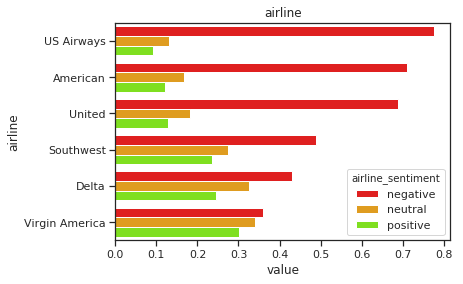

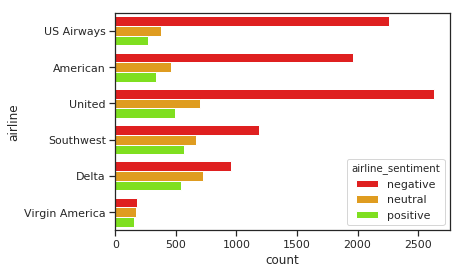

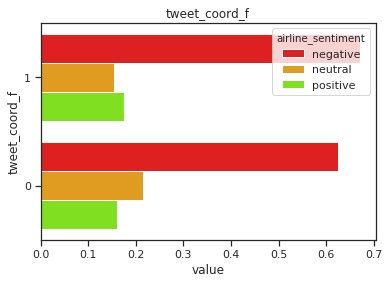

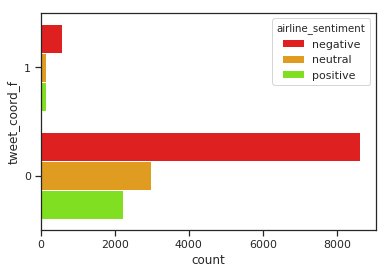

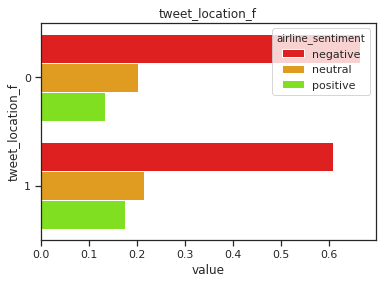

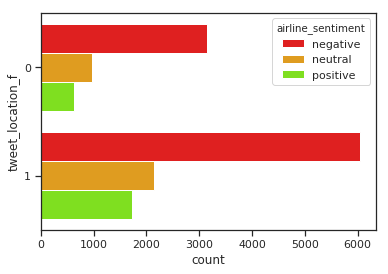

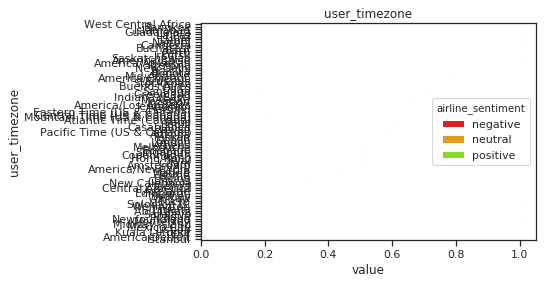

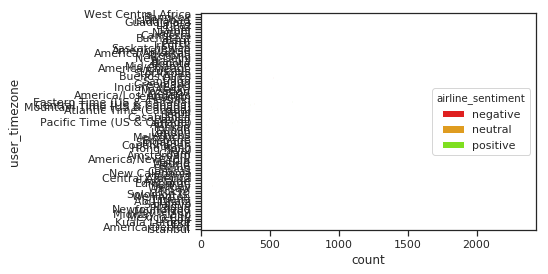

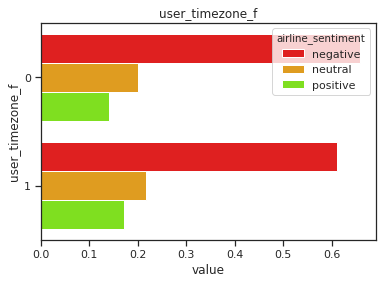

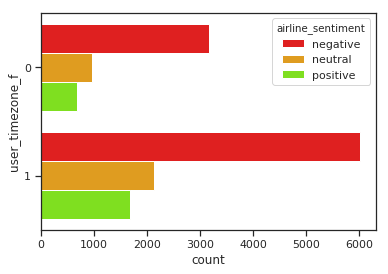

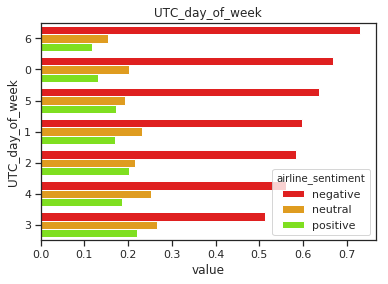

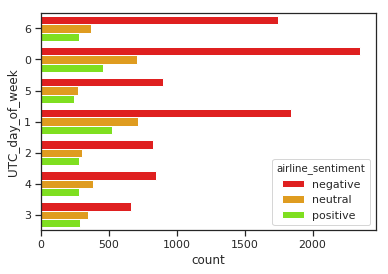

In [19]:
df0['UTC_day_of_week'] = df0['UTC_day_of_week'].astype('category')
categorical_variables = sorted(set(df0.select_dtypes(include = ['object', 'category'])) - set(['UTC_date', 'airline_sentiment', 'airline_sentiment_gold', 'negativereason', 'negativereason_gold', 'text', 'name', 'tweet_coord', 'tweet_location']), key = str.lower)
charts_d = {}
for y in categorical_variables:
    #print(y)
    df5 = pd.crosstab(df0[y], df0['airline_sentiment'], normalize = 0).reset_index().sort_values('negative', ascending = False)
    df5[y] = df5[y].astype('category')
    charts_d[y] = {}
    charts_d[y]['chart0'], charts_d[y]['ax0'] = plt.subplots()
    sns.barplot(y = y, x = 'value', data = df5.melt(id_vars = y), order = df5[y], \
                  hue = 'airline_sentiment', hue_order = palette.keys(), palette = palette)
    charts_d[y]['ax0'].set_title(y)
    charts_d[y]['chart1'], charts_d[y]['ax1'] = plt.subplots()
    sns.countplot(y = y, data = df0, order = df5[y], hue = 'airline_sentiment', hue_order = palette.keys(), palette = palette)

Word clouds

In [20]:
df0['text2'] = df0['text'].str.strip() \
    .str.replace('(\s*RT @\w+: )|(\s+http\S+$)', '', regex = True) \
    .str.replace('\s*@\w+\s*', ' user ', regex = True) \
    .str.replace('\s*http\S+\s*', ' website ', regex = True) \
    .str.replace('\s*&amp;\s*', ' and ', regex = True)

for x in df0['airline'].unique():
    v2 = df0['airline'] == x
    for y in x.split(' '):
        df0['text2'][v2] = df0['text2'][v2].str.replace('\s*{}\s*'.format(y), ' airline ', regex = True)

df0['text2'] = df0['text2'].str.strip().str.lower()

/home/pk/anaconda3/envs/nlp37/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


By sentiment and airline_sentiment:


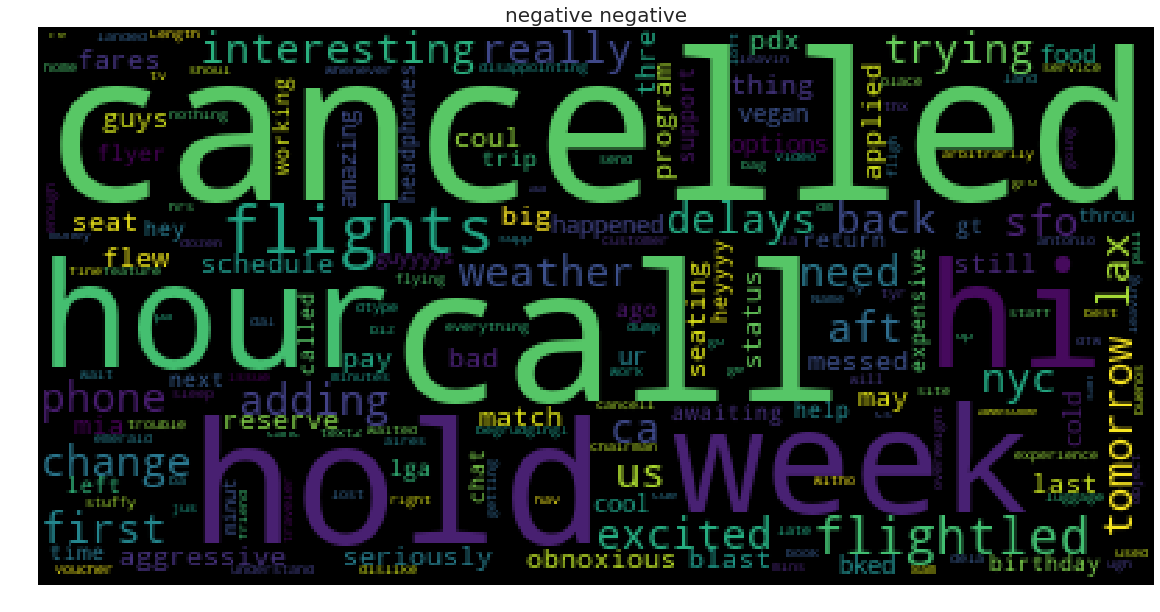

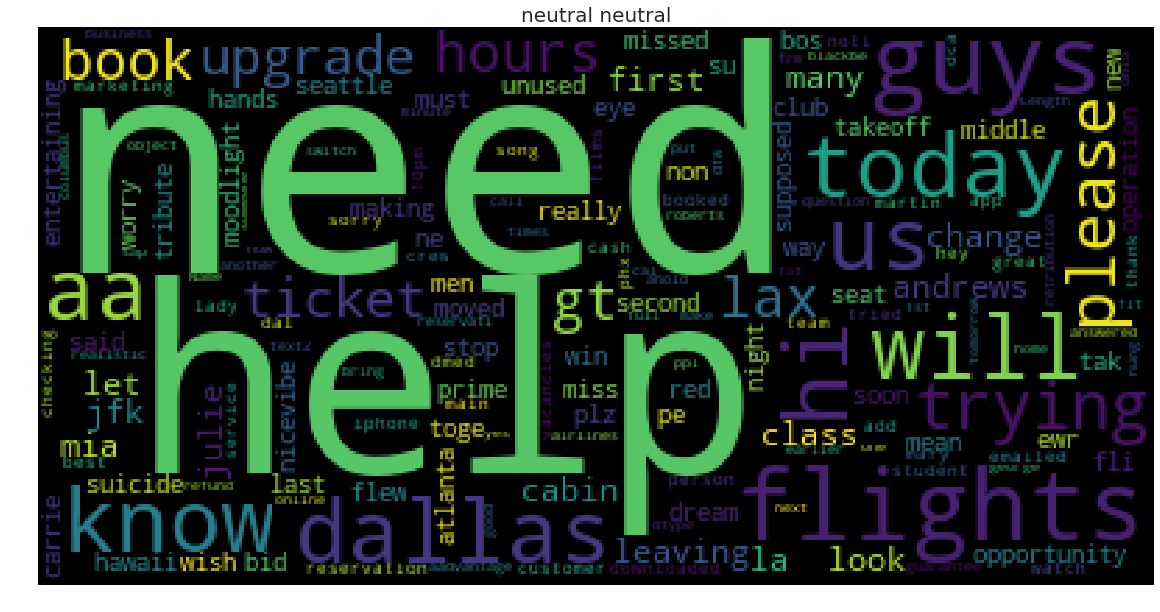

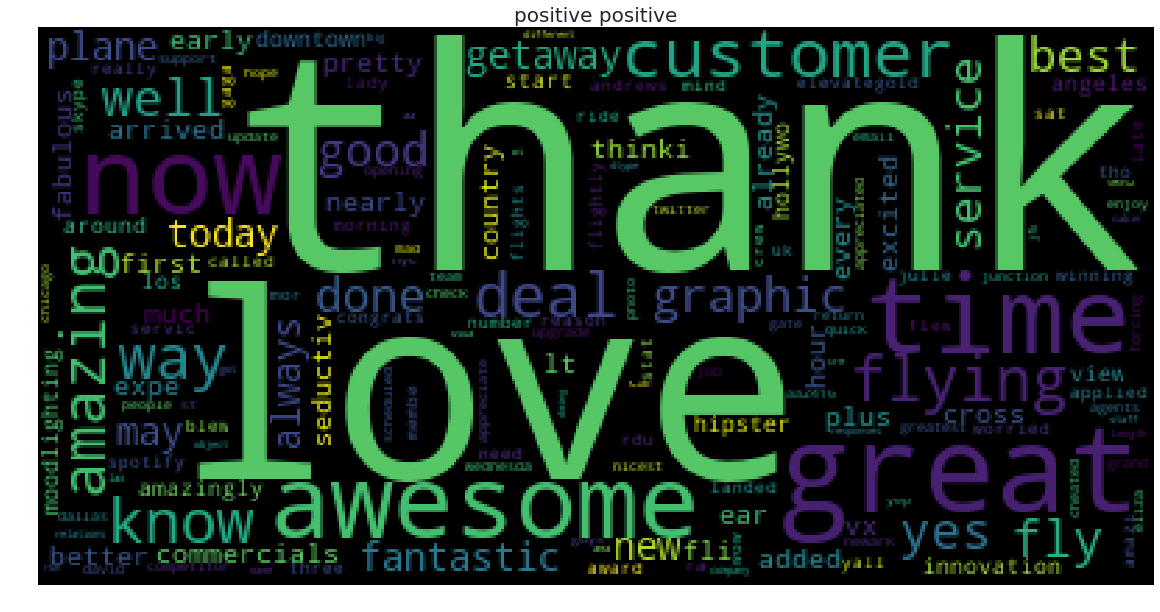

By sentiment and airline:


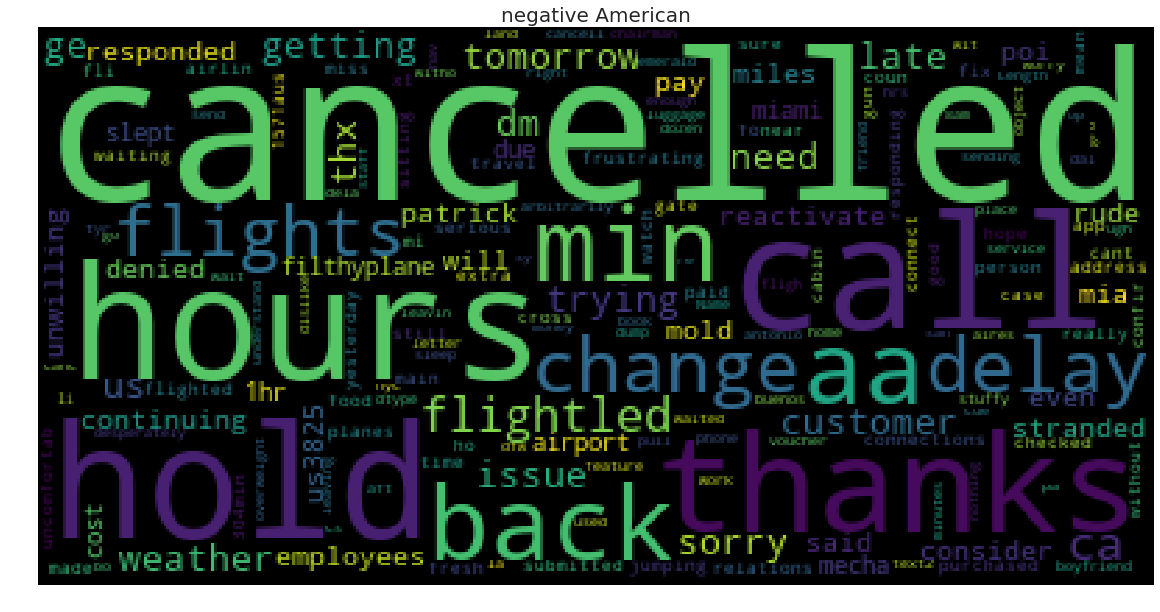

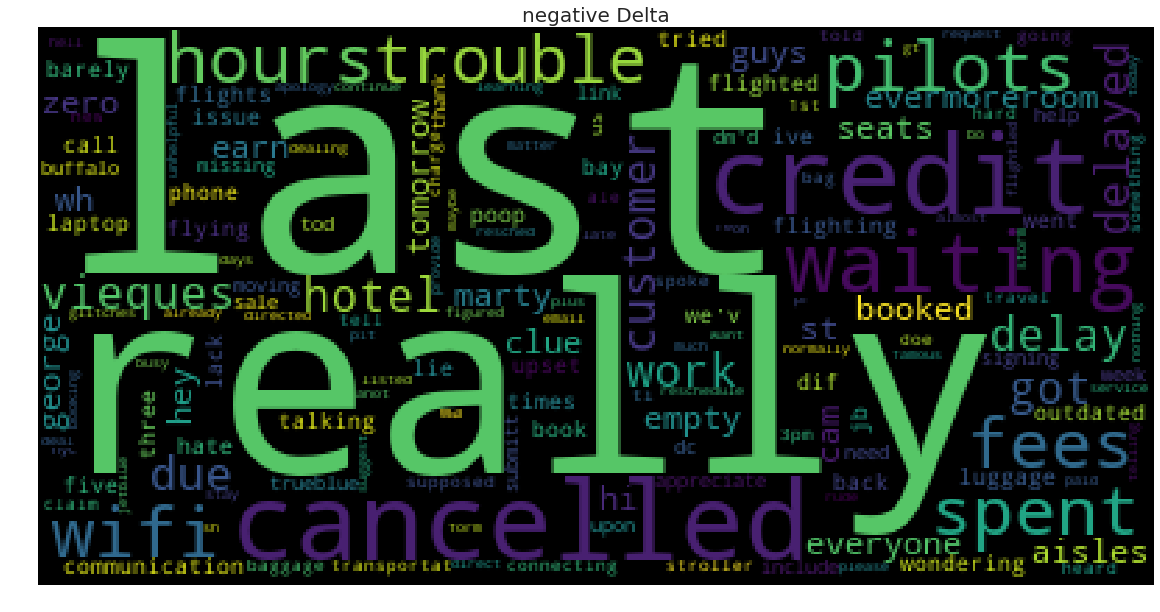

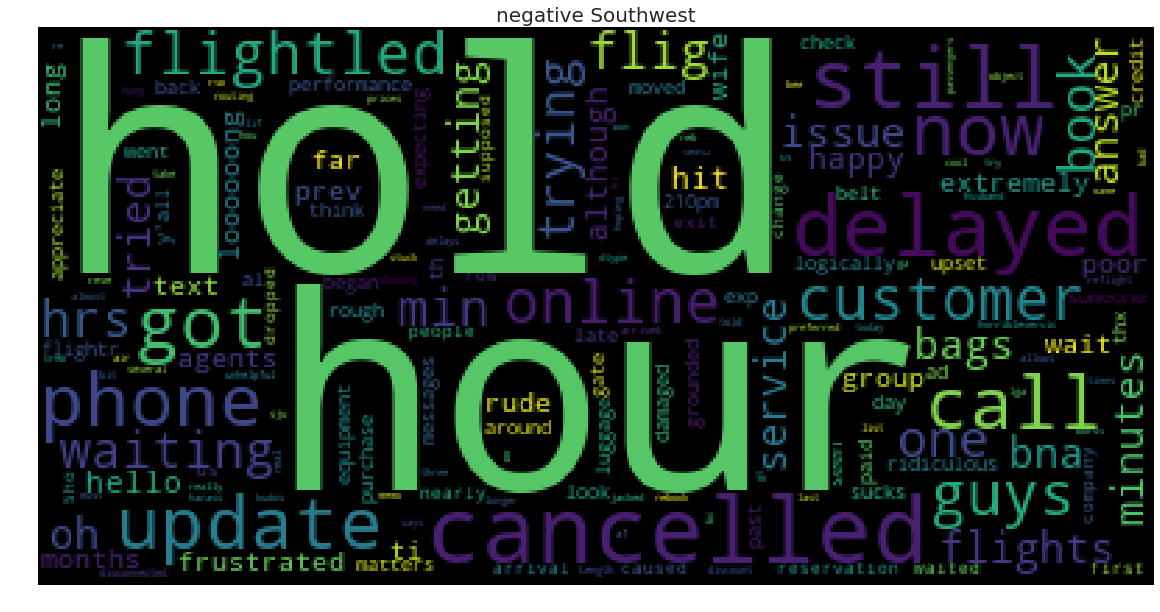

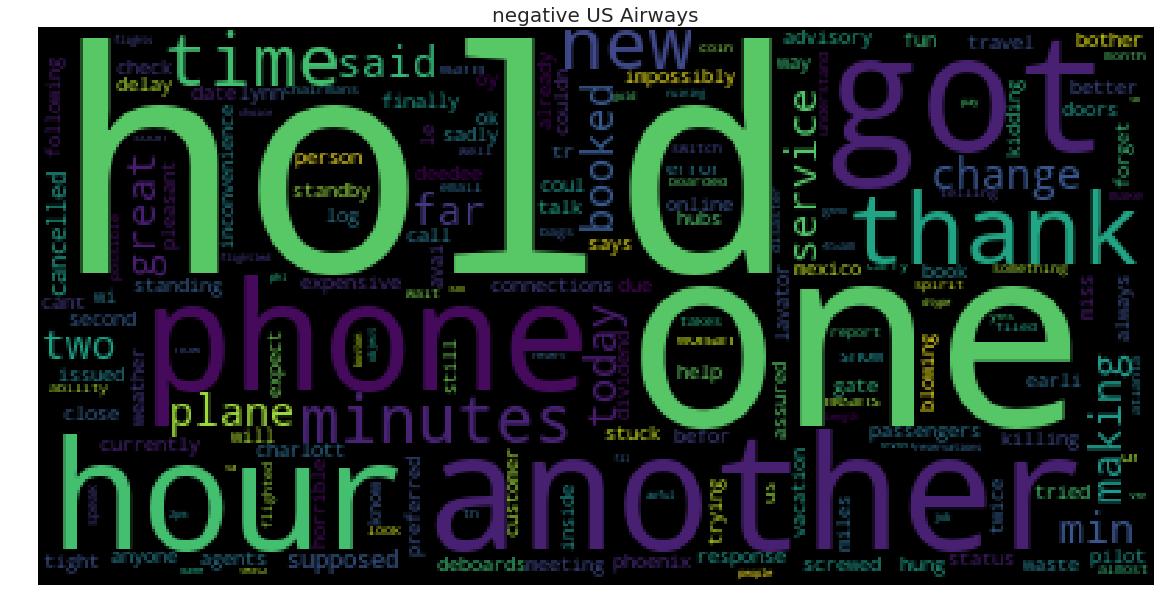

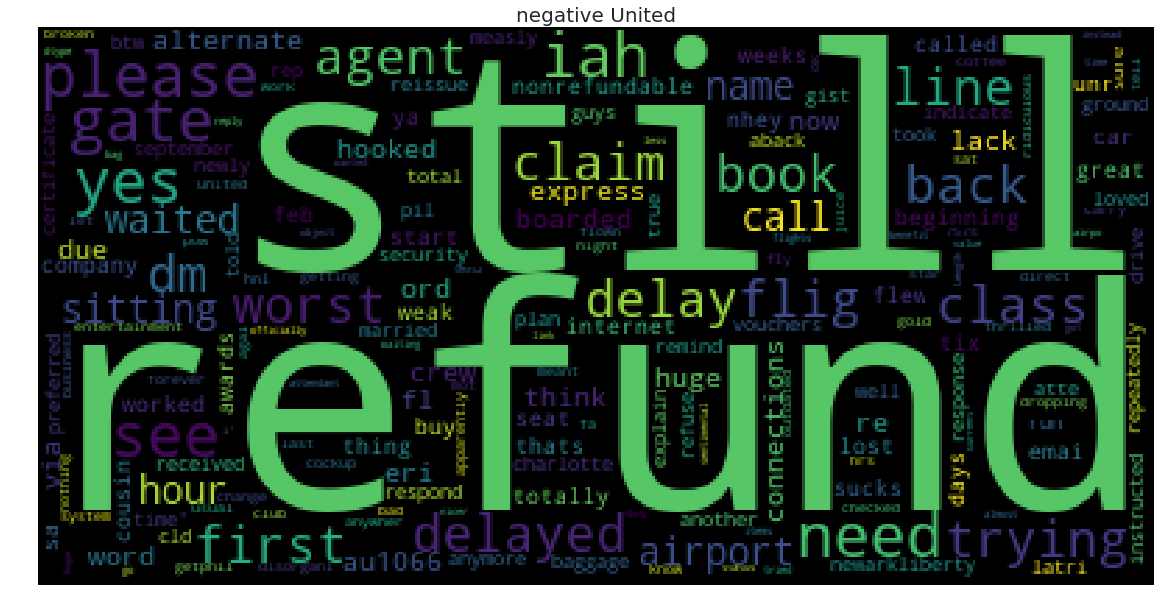

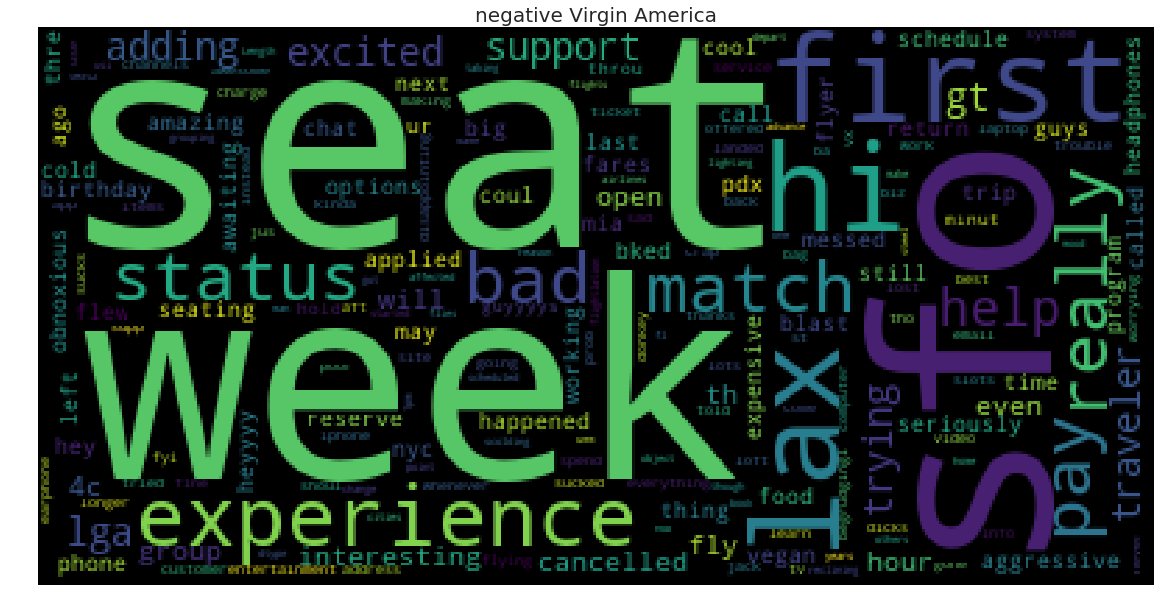

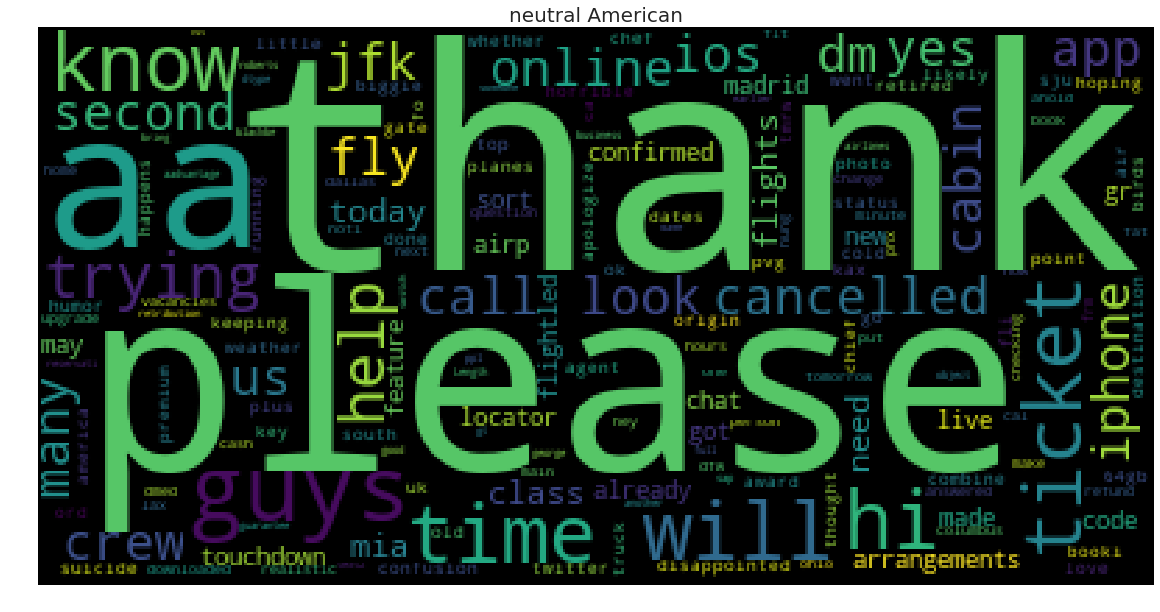

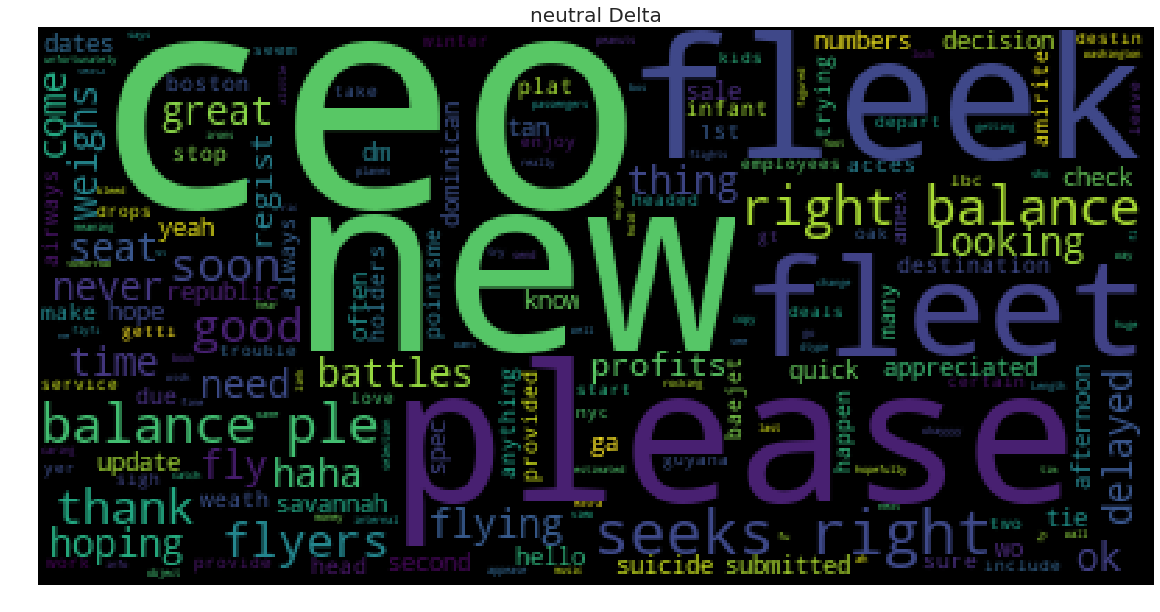

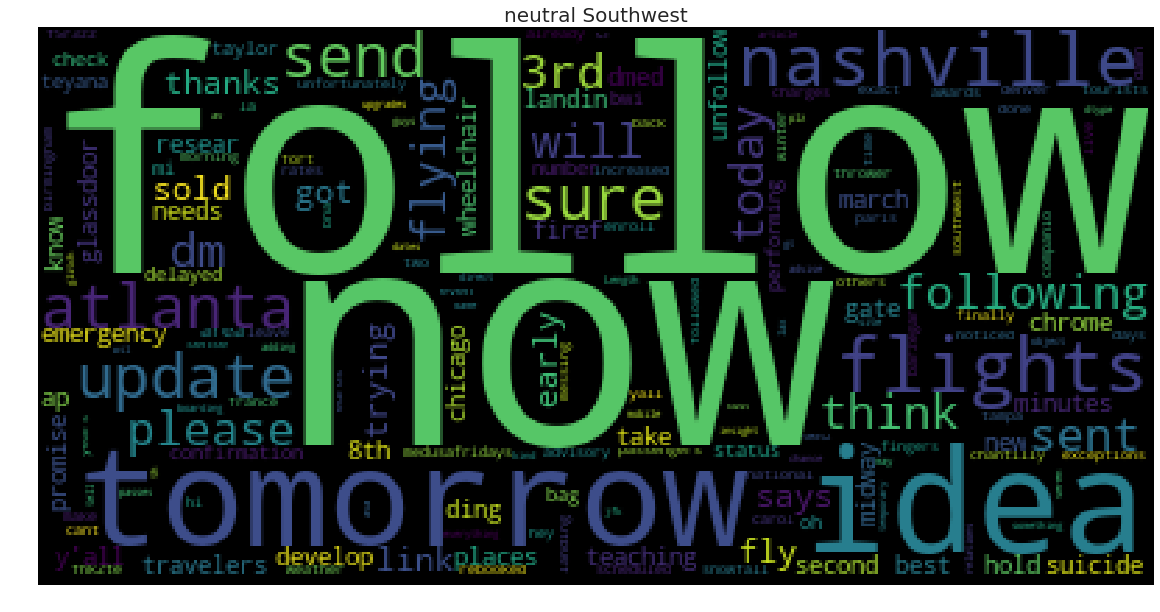

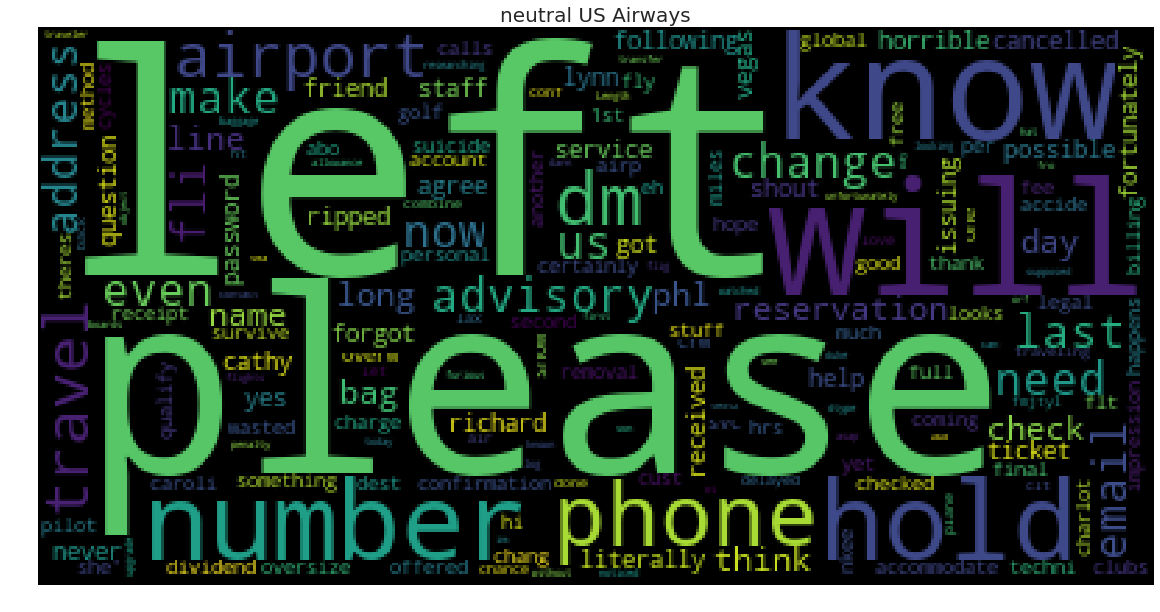

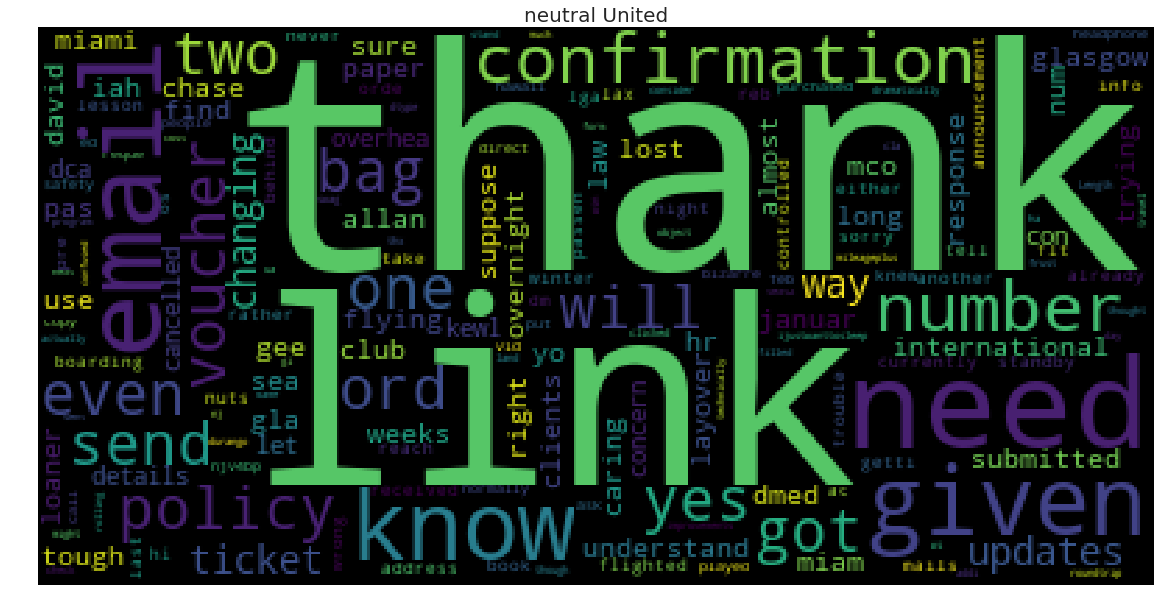

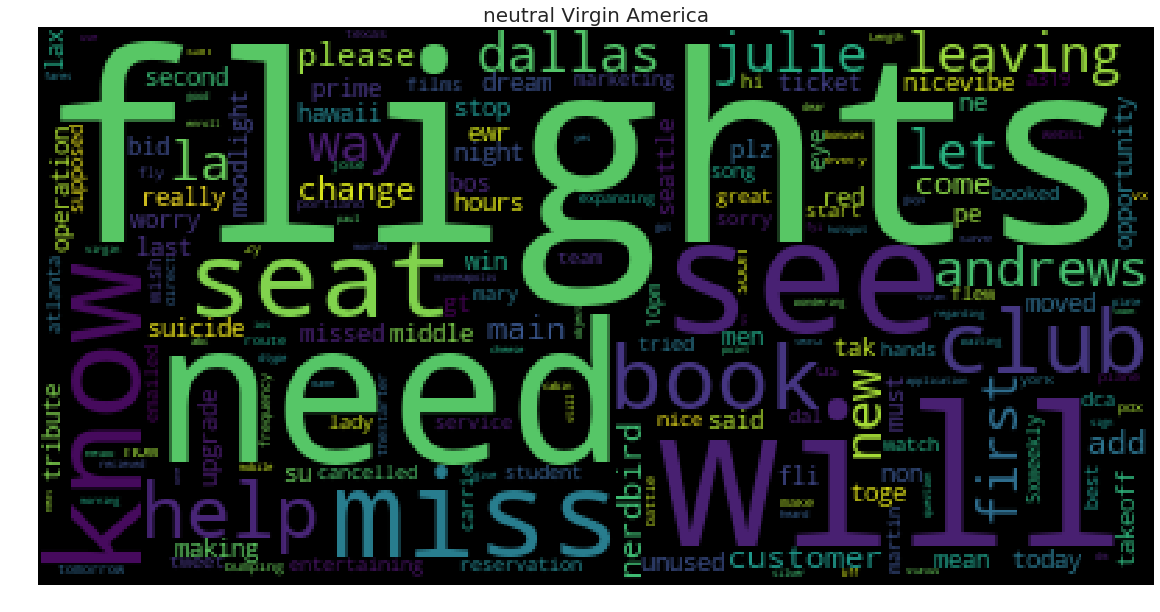

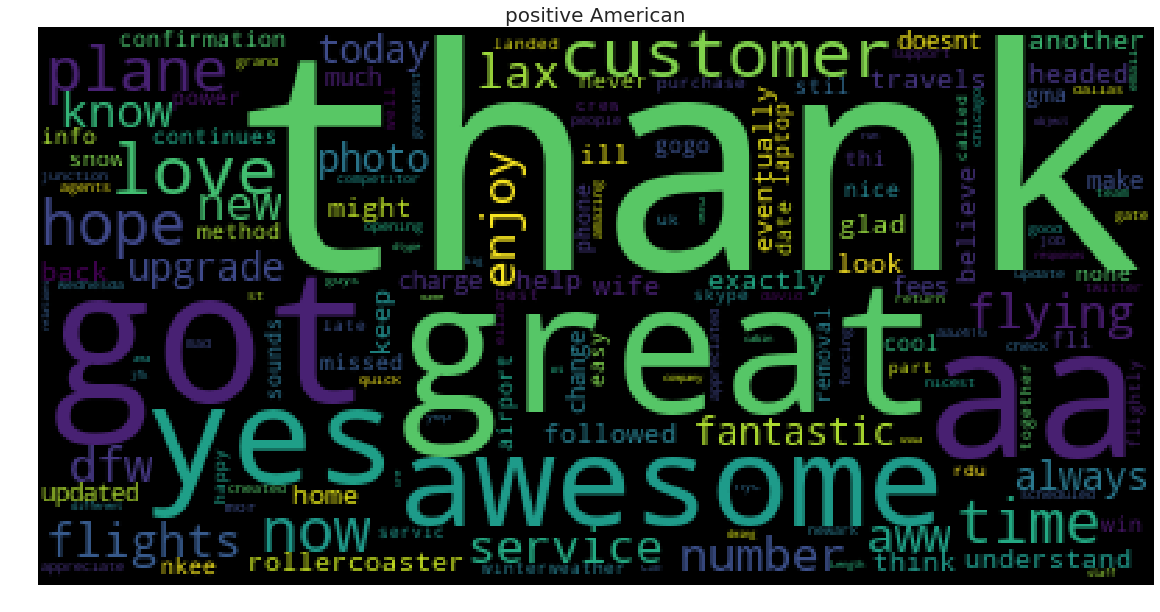

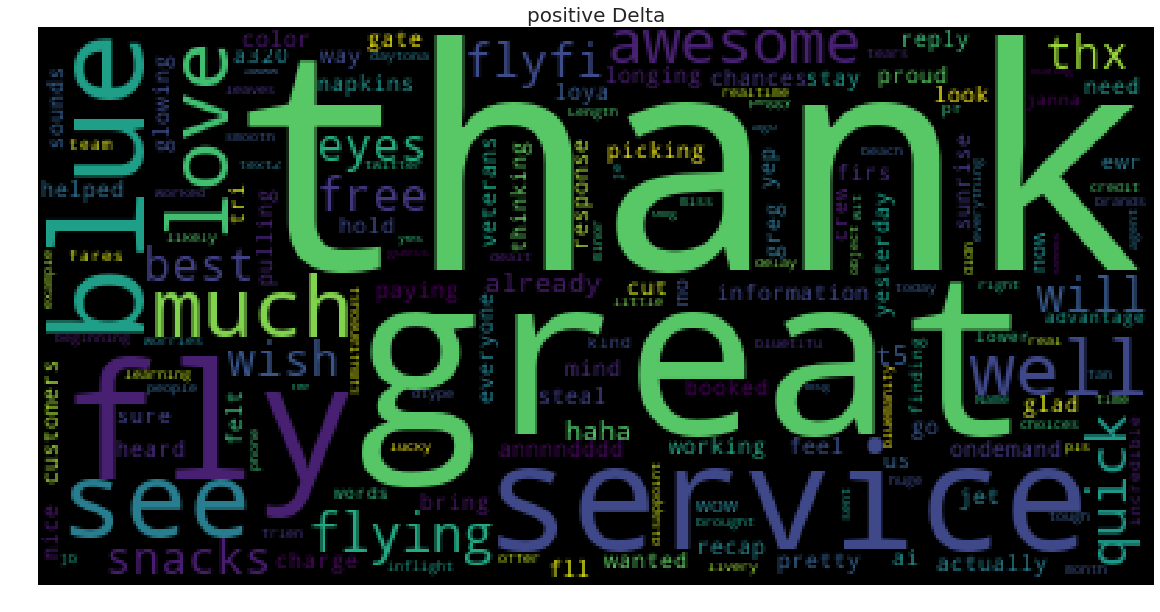

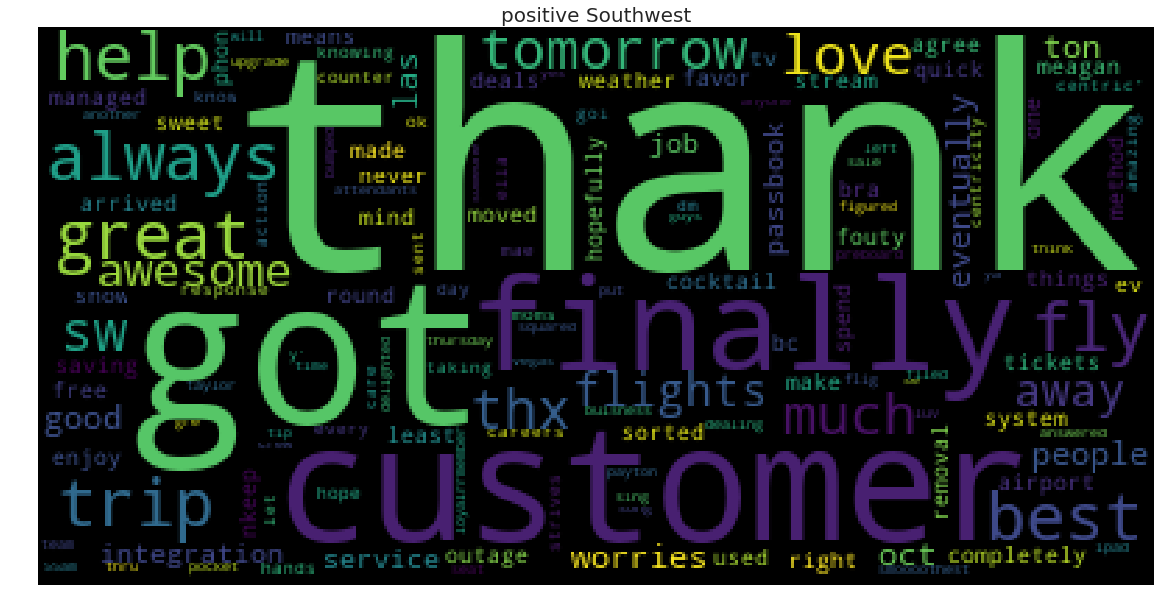

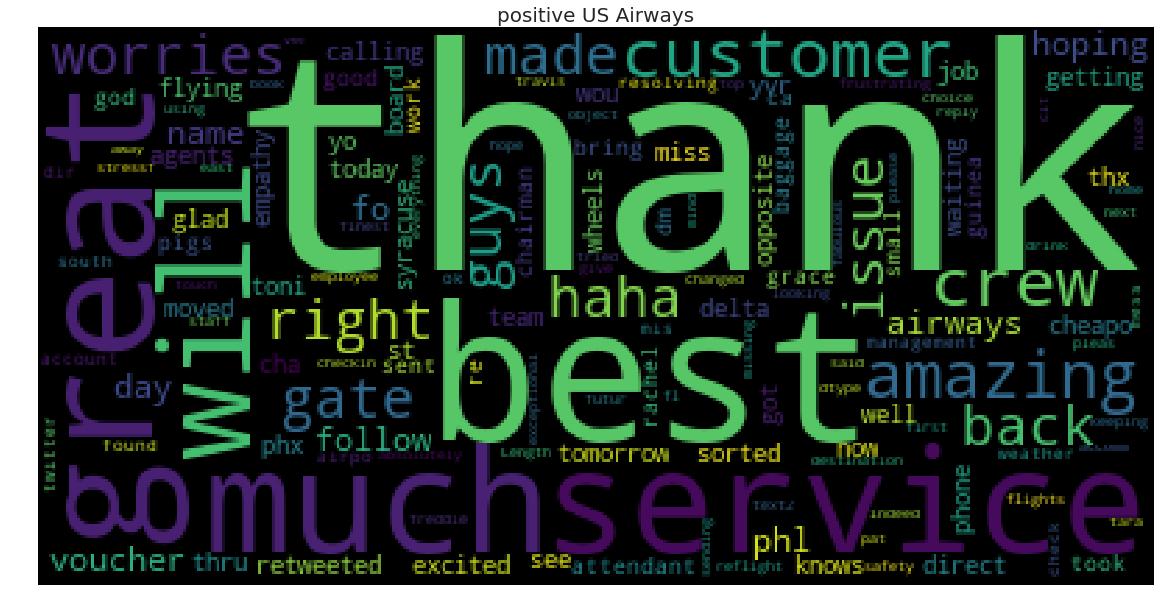

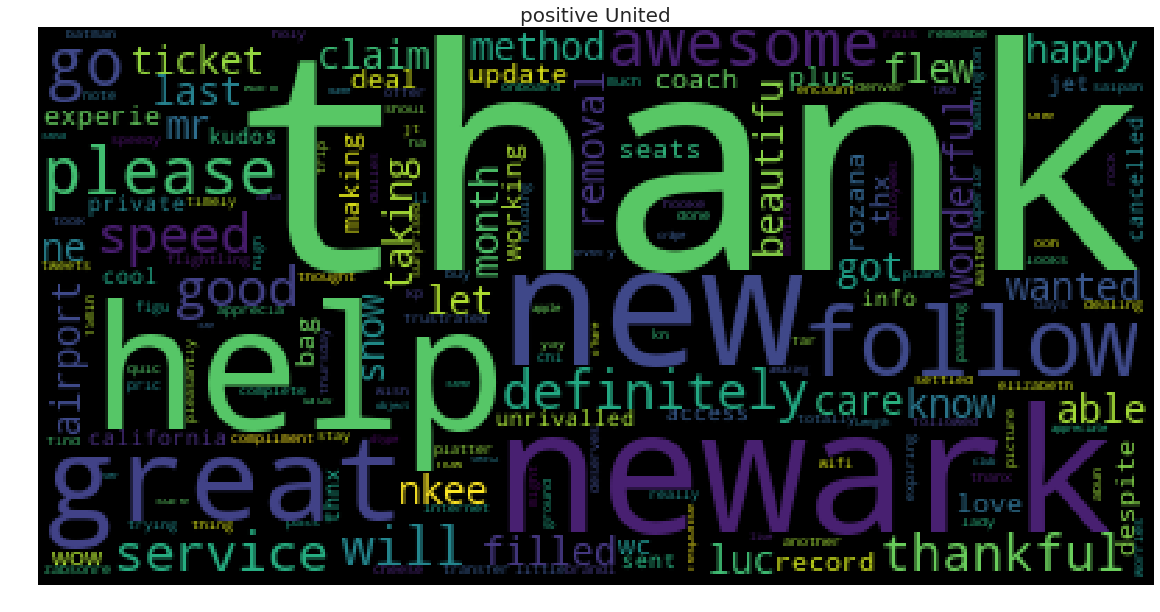

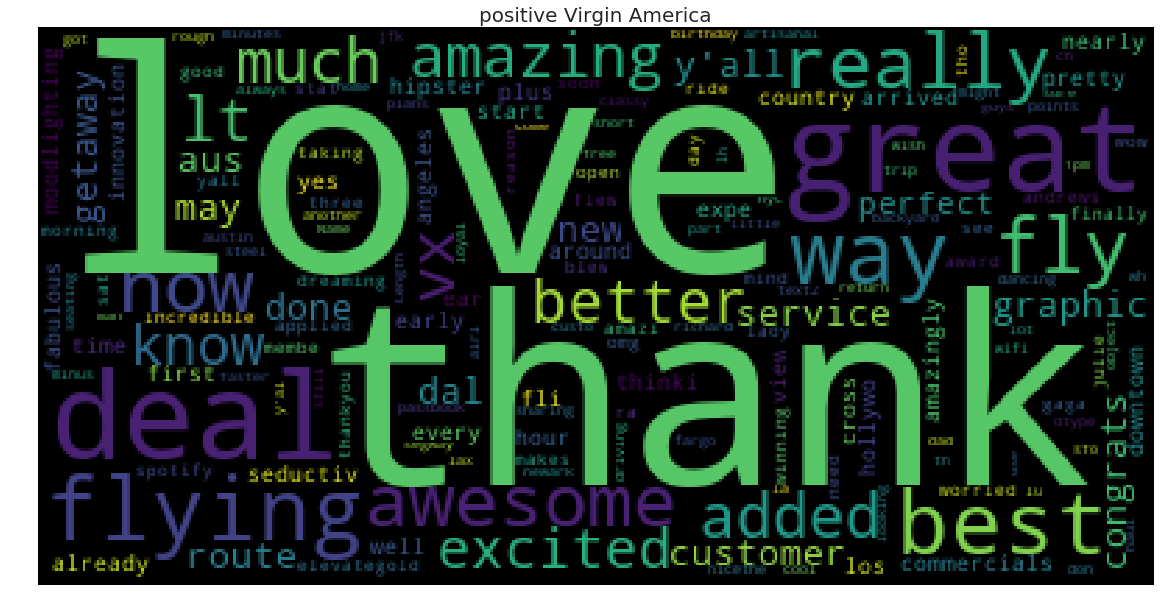

By sentiment and negativereason:


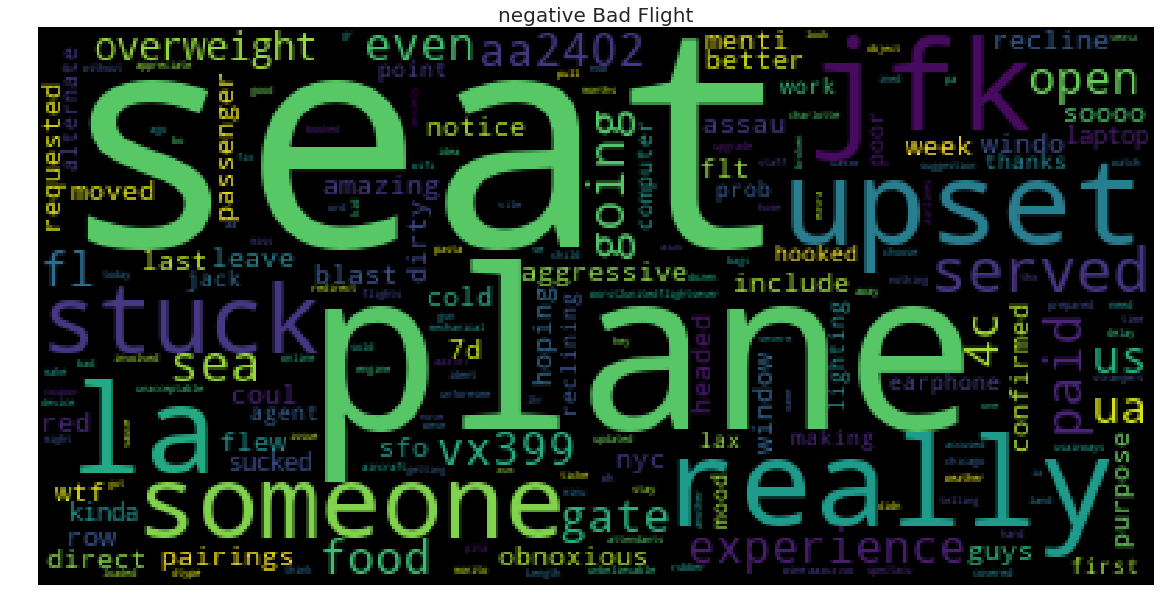

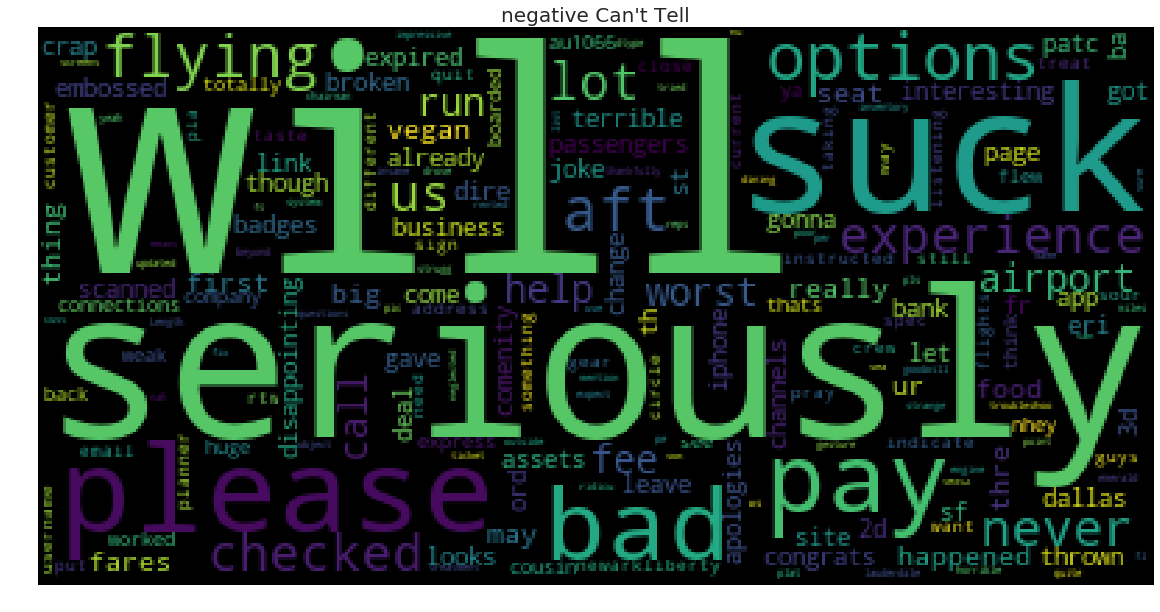

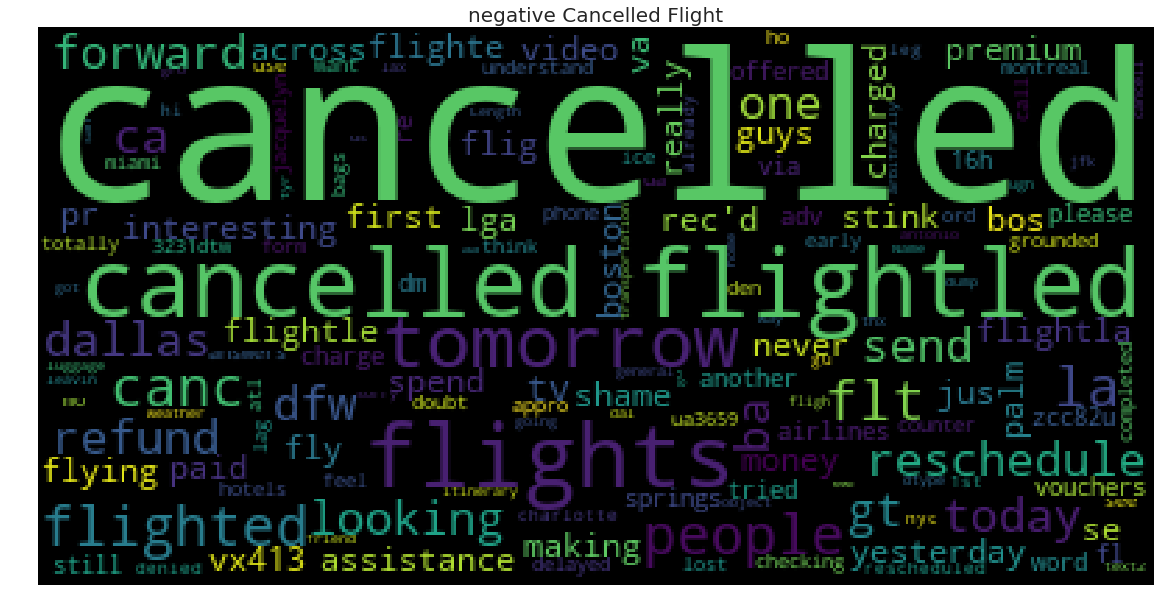

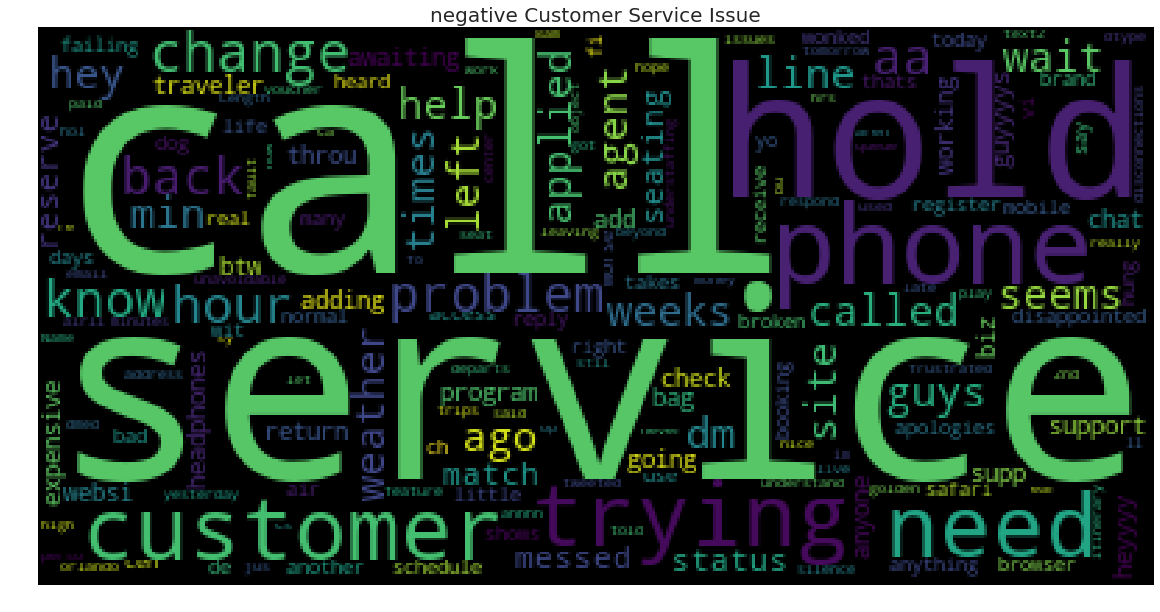

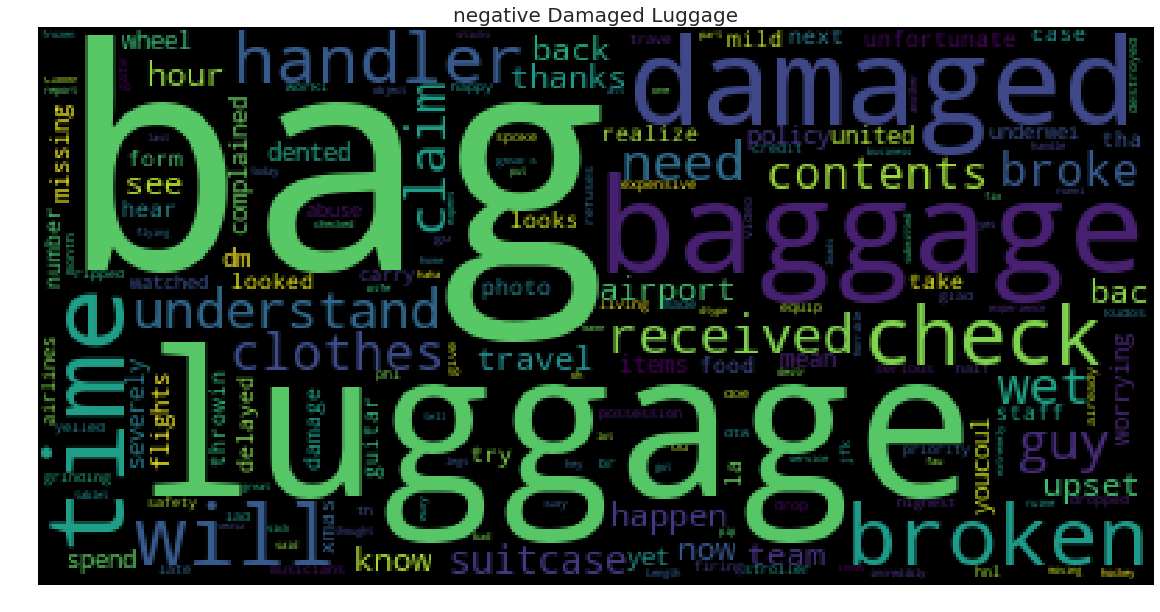

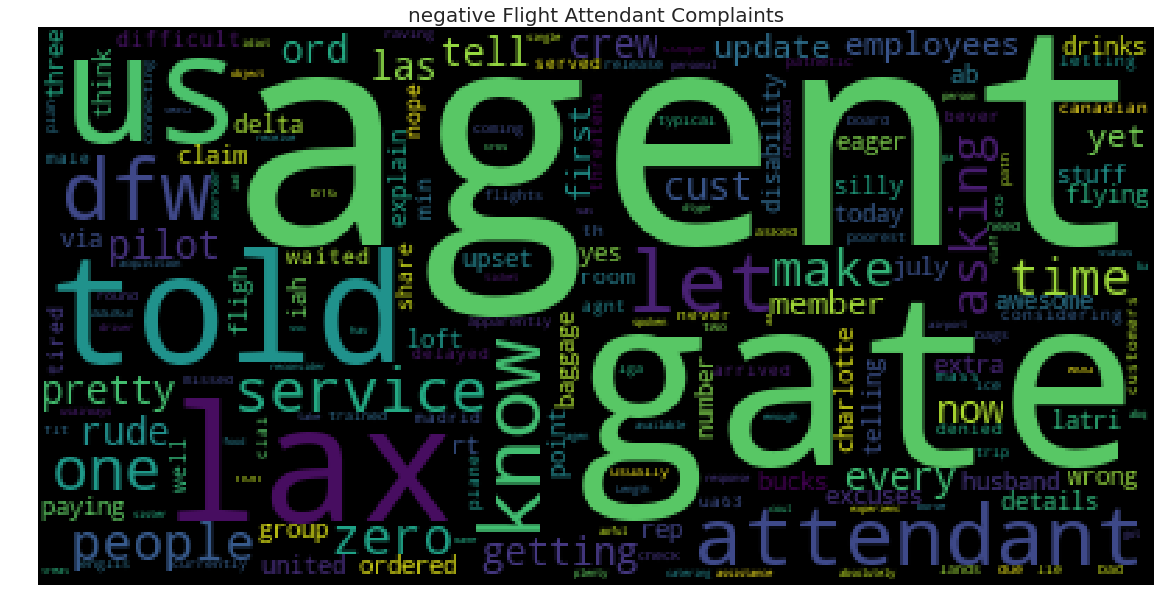

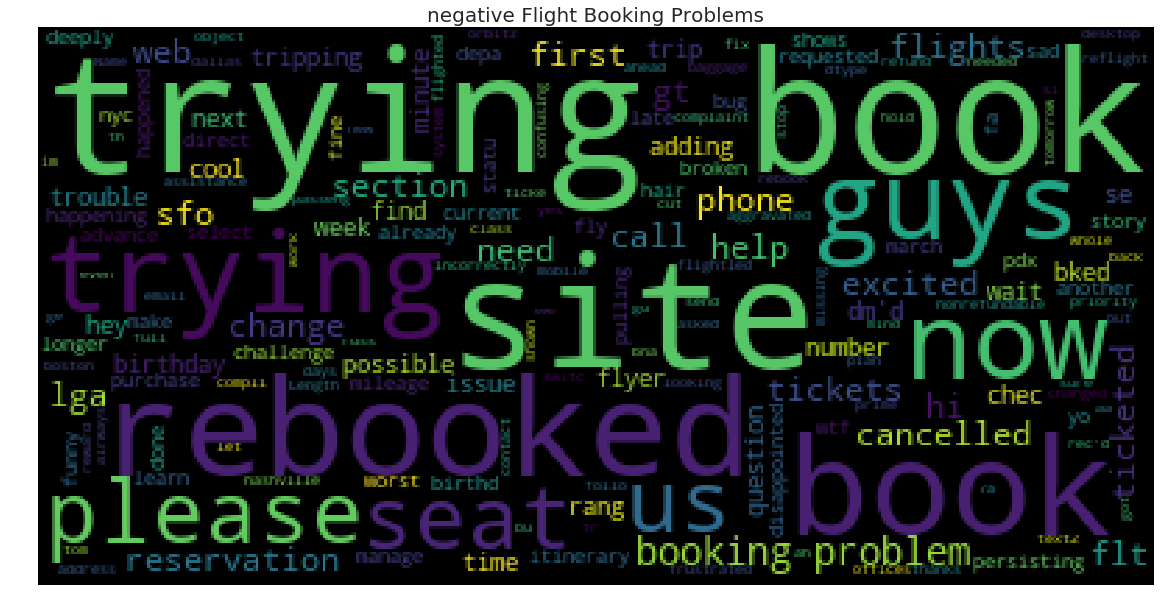

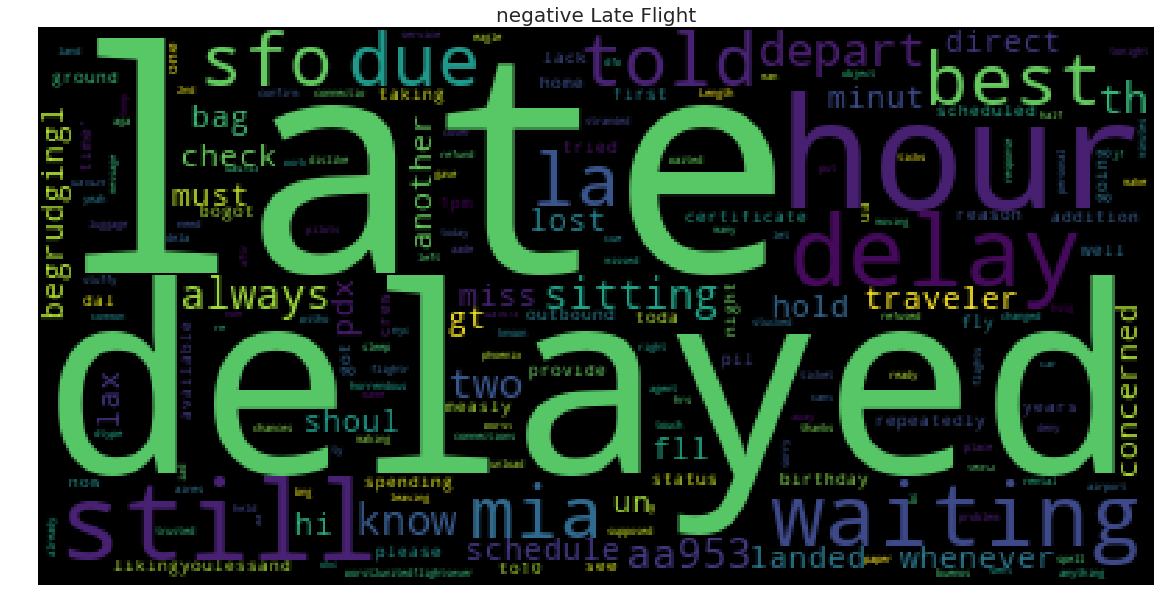

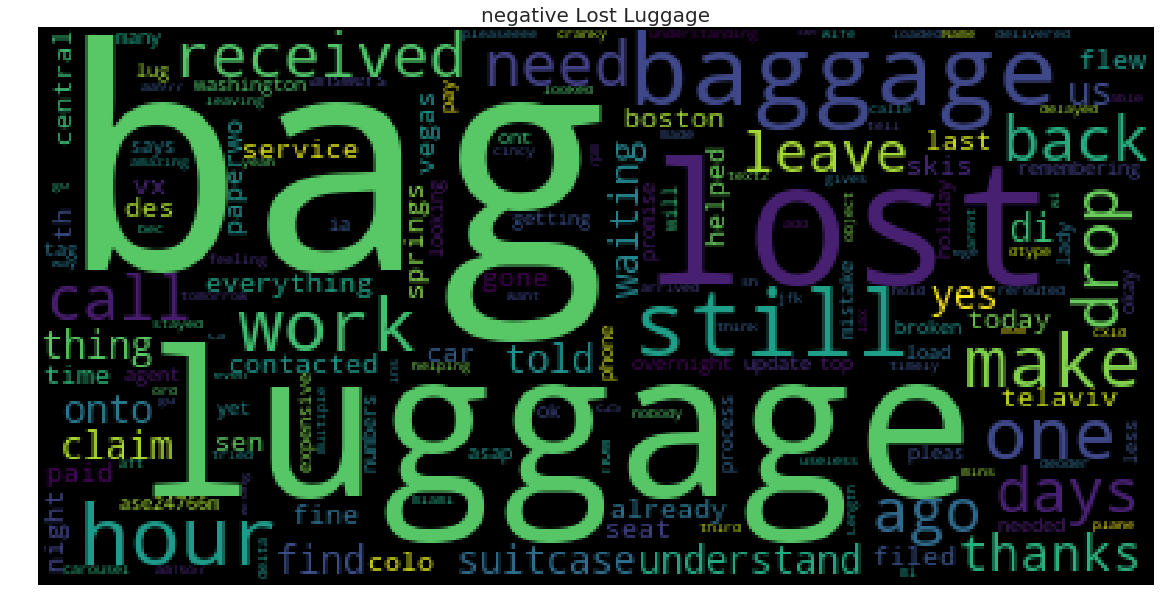

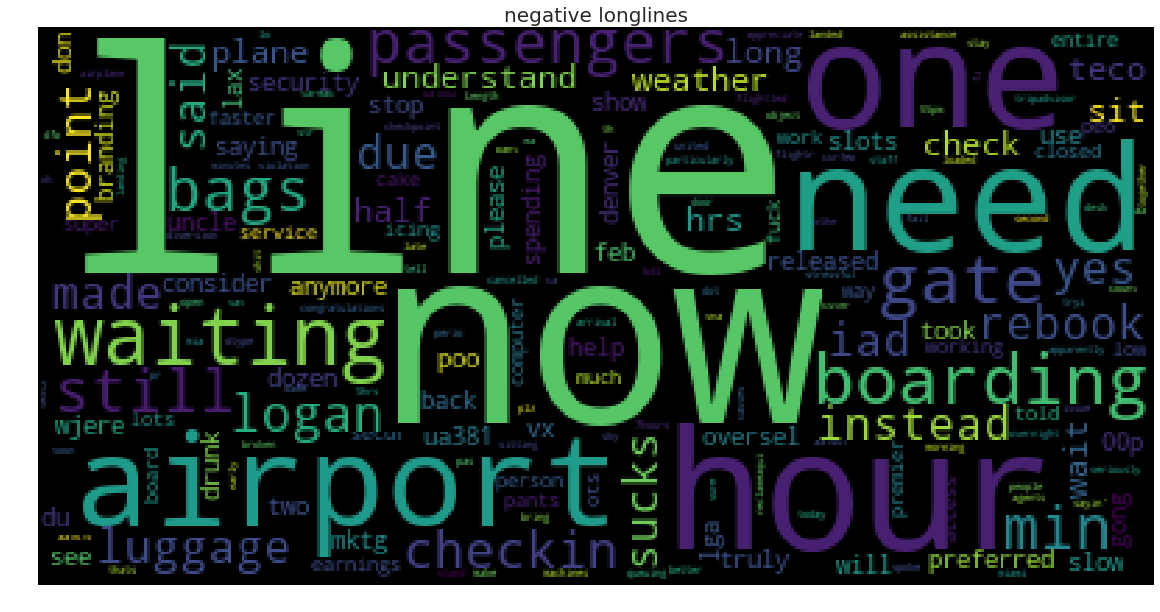

In [21]:
for k in ['airline_sentiment', 'airline', 'negativereason']:
    print('By sentiment and {}:'.format(k))
    for x in [x for x in palette.keys() if x in df0[df0[k].notna()]['airline_sentiment'].unique()]:
        for y in sorted(df0[k][df0[k].notna()].unique()):
            if sum((df0['airline_sentiment'] == x) & (df0[k] == y)) > 0:
                plt.figure(figsize = (20, 20))
                wordcloud = WordCloud(
                                      background_color = 'black',
                                      stopwords = set(STOPWORDS).union({'flight', 'user', 'website', 'airline'}),
                                      max_words = 1000,
                                      max_font_size = 110,
                                      random_state = seed
                                    ).generate(str(df0['text2'][(df0['airline_sentiment'] == x) & (df0[k] == y)]))
                plt.imshow(wordcloud)
                plt.title(' '.join([x, y]), fontsize = 20)
                plt.axis('off')
                plt.show()

**Data engineering**

In [22]:
train_full_file = './data/train_full.csv'
train_negatives_file = './data/train_negatives.csv'
df0.to_csv(train_full_file, index = False)
df0[df0['negativereason'].notna()].to_csv(train_negatives_file, index = False)

**Model training setup**

In [23]:
## Basic imports
import logging, sys
from pathlib import Path

## Sampling imports
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

## DL training imports
import torch
from pytorch_pretrained_bert.tokenization import BertTokenizer
from fast_bert.data import BertDataBunch
from fast_bert.learner import BertLearner

## Metrics imports
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from torch import Tensor
from fast_bert.metrics import accuracy#, roc_auc, fbeta
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, multilabel_confusion_matrix

/home/pk/anaconda3/envs/nlp37/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [24]:
## Metrics functions
def multiclass_roc_auc_score_macro(y_pred:Tensor, y_true:Tensor, average = 'macro', sample_weight = None):
    '''Based on https://medium.com/@plog397/auc-roc-curve-scoring-function-for-multi-class-classification-9822871a6659 '''
    y_pred = np.argmax(y_pred, axis = 1) #.numpy()
    #y_true = y_true.detach().cpu().numpy()
    lb = LabelBinarizer()
    lb.fit(y_true)
    y_true = lb.transform(y_true)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_true, y_pred, average = average, sample_weight = sample_weight)

def multiclass_roc_auc_score_micro(y_pred:Tensor, y_true:Tensor):
    return multiclass_roc_auc_score_macro(y_pred, y_true, average = 'micro')

def F1_macro(y_pred:Tensor, y_true:Tensor, average = 'macro', sample_weight = None):
    y_pred = np.argmax(y_pred, axis = 1) #.numpy()
    #y_true = y_true.detach().cpu().numpy()
    return f1_score(y_true, y_pred, average = average, sample_weight = sample_weight)

def F1_micro(y_pred:Tensor, y_true:Tensor):
    return F1_macro(y_pred, y_true, average = 'micro')

Training function

In [25]:
def train_model(
        labels_list,
        job_label,
        weights_column,
        input_file,
        labels_column,
        rebalance_data = False,
        reweigh_data = False
        ):
    ## Metrics functions that need labels upfront
    def confusion_matrix_overall(y_pred:Tensor, y_true:Tensor, labels:list = labels_list, sample_weight = None):
        y_pred = np.argmax(y_pred, axis = 1) #.numpy()
        #y_true = y_true.detach().cpu().numpy()
        return confusion_matrix(y_true, y_pred, labels = [i for i in range(len(labels))], sample_weight = sample_weight)

    def confusion_matrix_by_class(y_pred:Tensor, y_true:Tensor, labels:list = labels_list, sample_weight = None, samplewise = False):
        y_pred = np.argmax(y_pred, axis = 1) #.numpy()
        #y_true = y_true.detach().cpu().numpy()
        return multilabel_confusion_matrix(y_true, y_pred, labels = [i for i in range(len(labels))], sample_weight = sample_weight, samplewise = samplewise)

    def roc_auc_score_by_class(y_pred:Tensor, y_true:Tensor, labels:list = labels_list, average = 'micro', sample_weight = None):
        y_pred = np.argmax(y_pred, axis = 1).numpy()
        y_true = y_true.detach().cpu().numpy()
        roc_auc_score_d = {}
        for i in range(len(labels)):
            lb = LabelBinarizer()
            y_true_i = y_true.copy()
            y_true_i[y_true != i] = len(labels) + 1
            y_true_i = lb.fit_transform(y_true_i)
            y_pred_i = y_pred.copy()
            y_pred_i[y_pred != i] = len(labels) + 1
            y_pred_i = lb.transform(y_pred_i)
            roc_auc_score_d[labels[i]] = roc_auc_score(y_true_i, y_pred_i, average = average, sample_weight = sample_weight)
        return roc_auc_score_d

    def F1_by_class(y_pred:Tensor, y_true:Tensor, labels:list = labels_list, sample_weight = None):
        y_pred = np.argmax(y_pred, axis = 1) #.numpy()
        #y_true = y_true.detach().cpu().numpy()
        F1_by_class_d = {}
        for i in range(len(labels)):
            F1_by_class_d[labels[i]] = f1_score(y_true, y_pred, average = 'micro', labels = [i]) # pos_label = i,
        return F1_by_class_d
        # return f1_score(y_true, y_pred, average = None)


    args = {
        'job_label': job_label,
        'preprocess_data': {
                'preprocess_data': True,
                'rebalance_data': rebalance_data,
                'reweigh_data': reweigh_data,
                'reweigh_factor': 2.0,
                'weights_column': weights_column,
                'input_file': input_file,
                'training_share': 0.7,
                'validation_share': 0.2,
                'seed': seed
                },
        'data_labels': {
                'text': 'text2',
                'labels_column': labels_column,
                'labels_list': labels_list
                },
        'folders': {
                'log': Path('./logs/'),
                'data': Path('./data/'),
                'output': Path('./models/')
                },
        'BERT_model': 'bert-base-uncased',
        'lower_case': True,
        'max_sequence_length': 64, # 512 in BERT paper, but max tweet length in the data set is ~140 characters
        'training_batch_size': 32, #16,
        #"eval_batch_size": 32, #16,
        'learning_rate': 3e-5, #5e-6, # 3e-5 in BERT paper
        'training_epochs': 2, #4
        'warmup_schedule': 'warmup_cosine_hard_restarts',
        'warmup_proportion': 0.1,
        'gradient_accumulation_steps': 1,
        #"local_rank": -1,
        'FP16': False, # 16-bit fine-tuning (FP16) requires NVIDIA Volta (launched in 2018) or newer GPU. GTX1070 is earlier Pascal (2016).
        'FP16_loss_scale': 128,
        'metrics': {
                    'functions': {
                            #'FastBert roc_auc': roc_auc,
                            'FastBert accuracy': accuracy,
                            #'FastBert fbeta': fbeta,
                            'confusion_matrix_overall': confusion_matrix_overall,
                            'confusion_matrix_by_class': confusion_matrix_by_class,
                            'multiclass_roc_auc_score_macro': multiclass_roc_auc_score_macro,
                            'multiclass_roc_auc_score_micro': multiclass_roc_auc_score_micro,
                            'roc_auc_score_by_class': roc_auc_score_by_class,
                            'F1_macro': F1_macro,
                            'F1_micro': F1_micro,
                            'F1_by_class': F1_by_class
                            }
                }
    }

    for x in args['folders'].values():
        x.mkdir(exist_ok = True)
    data_folder = args['folders']['data'] / '{}{}'.format(args['job_label'], '/')
    data_folder.mkdir(exist_ok = True)

    ## Logging setup:
    run_start_time = pd.Timestamp.today(tz = 'UTC').strftime('%Y-%m-%d_%H-%M-%S')
    log_file = str(args['folders']['log']/'log-{}-{}.txt'.format(run_start_time, args['job_label']))

    logging.basicConfig(#filename = log_file, filemode = 'w', # filemode = 'a'
                        format = '%(name)s %(levelname)s %(asctime)s: %(message)s',
                        datefmt = '%Y-%m-%d_%H-%M-%S',
                        level = logging.INFO,
                        handlers = [
                                logging.StreamHandler(sys.stdout),
                                logging.FileHandler(log_file)
                                ])

    logging.captureWarnings(True)
    warnings_logger = logging.getLogger('py.warnings')

    logger = logging.getLogger('learner') # Logger for the learner object below.

    logging.info('Start: {}'.format(pd.Timestamp.today(tz = 'UTC')))
    logging.info(args)

    ### Device setup:
    torch.cuda.empty_cache()

    device = torch.device('cuda')
    if torch.cuda.device_count() > 1:
        # import apex # https://github.com/NVIDIA/apex
        multi_gpu = True
    else:
        multi_gpu = False
    logging.info('CUDA device count: {}, multi_gpu: {}'.format(torch.cuda.device_count(), multi_gpu))

    ### Data preprocessing:
    if args['preprocess_data']['preprocess_data']:
        df0 = pd.read_csv(args['preprocess_data']['input_file'])
        columns_to_process = [args['data_labels']['text'], args['data_labels']['labels_column']]
        if args['preprocess_data']['reweigh_data']:
            columns_to_process.append(args['preprocess_data']['weights_column'])
        df0 = df0[columns_to_process].fillna(0)

        train_df, df0 = train_test_split(df0,
                                         train_size = float(args['preprocess_data']['training_share']),
                                         stratify = df0[args['data_labels']['labels_column']],
                                         random_state = args['preprocess_data']['seed'])
        validation_df, test_df = train_test_split(df0,
                                                  train_size = float(args['preprocess_data']['validation_share'])/(1 - float(args['preprocess_data']['training_share'])),
                                                  stratify = df0[args['data_labels']['labels_column']],
                                                  random_state = args['preprocess_data']['seed'])

        df_d = {0: train_df, 1: validation_df, 2: test_df}

        if args['preprocess_data']['rebalance_data']:
            sm = SMOTE('not majority')
            for k in df_d:
                df_d[k].reset_index(drop = True, inplace = True)
                temp_index, _ = sm.fit_resample(df_d[k].index.to_numpy().reshape(-1, 1), pd.Categorical(df_d[k][args['data_labels']['labels_column']]).codes)
                df_d[k] = pd.DataFrame(temp_index).set_index(0).merge(df_d[k], how = 'left', left_index = True, right_index = True, validate = 'm:1')

        if args['preprocess_data']['reweigh_data']:
            for k, v in df_d.items():
                df_d[k].reset_index(drop = True, inplace = True)
                df_d[k] = pd.DataFrame(np.random.choice(df_d[k].index, size = int(len(df_d[k]) * args['preprocess_data']['reweigh_factor']), p = df_d[k][args['preprocess_data']['weights_column']] / df_d[k][args['preprocess_data']['weights_column']].sum())).set_index(0).merge(df_d[k], how = 'left', left_index = True, right_index = True,  validate = 'm:1')

        for x, name, header in [(pd.Series(args['data_labels']['labels_list']), 'labels.csv', False),
                                (df_d[0], 'train.csv', True),
                                (df_d[1], 'validation.csv', True),
                                (df_d[2], 'test.csv', True)]:
            x.to_csv(data_folder / name, header = header, index = False)

        del(df0, x, name, header)

    ### Data processing:
    #logging.info('Start {}: {}'.format(job_label, pd.Timestamp.today(tz = 'UTC')))
    tokenizer = BertTokenizer.from_pretrained(args['BERT_model'], do_lower_case = args['lower_case'])

    databunch = BertDataBunch(data_folder, data_folder, tokenizer = tokenizer,
                              train_file = 'train.csv', val_file = 'validation.csv', test_data = 'test.csv', label_file = 'labels.csv',
                              text_col = args['data_labels']['text'], label_col = args['data_labels']['labels_column'],
                              bs = args['training_batch_size'],
                              maxlen = args['max_sequence_length'],
                              multi_gpu = multi_gpu,
                              multi_label = False)

    ### Metrics setup:
    metrics = []
    for k, v in args['metrics']['functions'].items():
        metrics.append({'name': k, 'function': v})

    ### Model training:
    learner = BertLearner.from_pretrained_model(databunch, args['BERT_model'], metrics, device, logger,
                                                finetuned_wgts_path = None, # FINETUNED_PATH,
                                                warmup_proportion = args['warmup_proportion'],
                                                grad_accumulation_steps = args['gradient_accumulation_steps'],
                                                multi_gpu = multi_gpu,
                                                is_fp16 = args['FP16'],
                                                loss_scale = args['FP16_loss_scale'],
                                                multi_label = False)

    learner.fit(args['training_epochs'], lr = args['learning_rate'], schedule_type = args['warmup_schedule'])

    learner.save_and_reload(args['folders']['output'], '{}-{}'.format(args['job_label'], run_start_time).replace(' ', ''))

Run definitions

In [26]:
negativereason_labels = list(df0.negativereason.value_counts().index)
run_definitions = {
        'tweets_BERT_sentiment_01_basic':
            {
            'labels': list(palette.keys()),
            'rebalance_data': False,
            'reweigh_data': False,
            'weights_column': None,
            'input_file': train_full_file,
            'labels_column': 'airline_sentiment',
            },
        'tweets_BERT_sentiment_02_rebalance':
            {
            'labels': list(palette.keys()),
            'rebalance_data': True,
            'reweigh_data': False,
            'weights_column': None,
            'input_file': train_full_file,
            'labels_column': 'airline_sentiment',
            },
        'tweets_BERT_sentiment_03_reweigh':
            {
            'labels': list(palette.keys()),
            'rebalance_data': False,
            'reweigh_data': True,
            'weights_column': 'airline_sentiment_confidence',
            'input_file': train_full_file,
            'labels_column': 'airline_sentiment',
            },
        'tweets_BERT_sentiment_04_rebalance_reweigh':
            {
            'labels': list(palette.keys()),
            'rebalance_data': True,
            'reweigh_data': True,
            'weights_column': 'airline_sentiment_confidence',
            'input_file': train_full_file,
            'labels_column': 'airline_sentiment',
            },
        'tweets_BERT_negatives_01_basic':
            {
            'labels': negativereason_labels,
            'rebalance_data': False,
            'reweigh_data': False,
            'weights_column': None,
            'input_file': train_negatives_file,
            'labels_column': 'negativereason',
            },
        'tweets_BERT_negatives_02_rebalance':
            {
            'labels': negativereason_labels,
            'rebalance_data': True,
            'reweigh_data': False,
            'weights_column': None,
            'input_file': train_negatives_file,
            'labels_column': 'negativereason',
            },
        'tweets_BERT_negatives_03_reweigh':
            {
            'labels': negativereason_labels,
            'rebalance_data': False,
            'reweigh_data': True,
            'weights_column': 'negativereason_confidence',
            'input_file': train_negatives_file,
            'labels_column': 'negativereason',
            },
        'tweets_BERT_negatives_04_rebalance_reweigh':
            {
            'labels': negativereason_labels,
            'rebalance_data': True,
            'reweigh_data': True,
            'weights_column': 'negativereason_confidence',
            'input_file': train_negatives_file,
            'labels_column': 'negativereason',
            }
        }

**Training execution - I hit a bug similar to thi https://github.com/ultralytics/yolov3/issues/255 , hence could not loop through the training runs as planned :(**

In [27]:
for k, v in run_definitions.items():
    train_model(job_label = k,
        labels_list = v['labels'],
        rebalance_data = v['rebalance_data'],
        reweigh_data = v['reweigh_data'],
        weights_column = v['weights_column'],
        input_file = v['input_file'],
        labels_column = v['labels_column']
        )

root INFO 2019-05-26_18-07-54: Start: 2019-05-26 16:07:54.273174+00:00
root INFO 2019-05-26_18-07-54: {'job_label': 'tweets_BERT_sentiment_01_basic', 'preprocess_data': {'preprocess_data': True, 'rebalance_data': False, 'reweigh_data': False, 'reweigh_factor': 2.0, 'weights_column': None, 'input_file': './data/train_full.csv', 'training_share': 0.7, 'validation_share': 0.2, 'seed': 42}, 'data_labels': {'text': 'text2', 'labels_column': 'airline_sentiment', 'labels_list': ['negative', 'neutral', 'positive']}, 'folders': {'log': PosixPath('logs'), 'data': PosixPath('data'), 'output': PosixPath('models')}, 'BERT_model': 'bert-base-uncased', 'lower_case': True, 'max_sequence_length': 64, 'training_batch_size': 32, 'learning_rate': 3e-05, 'training_epochs': 2, 'warmup_schedule': 'warmup_cosine_hard_restarts', 'warmup_proportion': 0.1, 'gradient_accumulation_steps': 1, 'FP16': False, 'FP16_loss_scale': 128, 'metrics': {'functions': {'FastBert accuracy': <function accuracy at 0x7f52aa267620>,

learner INFO 2019-05-26_18-11-09: Loss after epoch 0 - 0.5463525186817966
learner INFO 2019-05-26_18-11-09: Running evaluation


learner INFO 2019-05-26_18-11-31: Eval results:
learner INFO 2019-05-26_18-11-31:   eval_loss = 0.411466128476288
learner INFO 2019-05-26_18-11-31:   metrics = {'FastBert accuracy': 0.8435792349726776, 'confusion_matrix_overall': array([[1725,   77,   33],
       [ 193,  374,   53],
       [  61,   41,  371]]), 'confusion_matrix_by_class': array([[[ 839,  254],
        [ 110, 1725]],

       [[2190,  118],
        [ 246,  374]],

       [[2369,   86],
        [ 102,  371]]]), 'multiclass_roc_auc_score_macro': 0.8348484154264161, 'multiclass_roc_auc_score_micro': 0.8826844262295083, 'roc_auc_score_by_class': {'negative': 0.8538332863827528, 'neutral': 0.7760496449935709, 'positive': 0.8746623149029249}, 'F1_macro': 0.7916911574517641, 'F1_micro': 0.8435792349726776, 'F1_by_class': {'negative': 0.9045621394861039, 'neutral': 0.6726618705035972, 'positive': 0.7978494623655914}}
learner INFO 2019-05-26_18-11-31: ------------------------------------------------------------------------------

learner INFO 2019-05-26_18-14-25: Eval results:
learner INFO 2019-05-26_18-14-25:   eval_loss = 0.41399241789527563
learner INFO 2019-05-26_18-14-25:   metrics = {'FastBert accuracy': 0.8545081967213115, 'confusion_matrix_overall': array([[1695,  107,   33],
       [ 142,  433,   45],
       [  48,   51,  374]]), 'confusion_matrix_by_class': array([[[ 903,  190],
        [ 140, 1695]],

       [[2150,  158],
        [ 187,  433]],

       [[2377,   78],
        [  99,  374]]]), 'multiclass_roc_auc_score_macro': 0.8564545957260515, 'multiclass_roc_auc_score_micro': 0.8908811475409836, 'roc_auc_score_by_class': {'negative': 0.8749361181259988, 'neutral': 0.8149647788896963, 'positive': 0.8794628901624593}, 'F1_macro': 0.8116834831155174, 'F1_micro': 0.8545081967213115, 'F1_by_class': {'negative': 0.911290322580645, 'neutral': 0.7151114781172584, 'positive': 0.8086486486486486}}
learner INFO 2019-05-26_18-14-25: -----------------------------------------------------------------------------

RuntimeError: trying to initialize the default process group twice!

In [27]:
for k, v in {'tweets_BERT_sentiment_02_rebalance': run_definitions['tweets_BERT_sentiment_02_rebalance']}.items():
    train_model(job_label = k,
        labels_list = v['labels'],
        rebalance_data = v['rebalance_data'],
        reweigh_data = v['reweigh_data'],
        weights_column = v['weights_column'],
        input_file = v['input_file'],
        labels_column = v['labels_column']
        )

root INFO 2019-05-26_18-24-10: Start: 2019-05-26 16:24:10.969200+00:00
root INFO 2019-05-26_18-24-10: {'job_label': 'tweets_BERT_sentiment_02_rebalance', 'preprocess_data': {'preprocess_data': True, 'rebalance_data': True, 'reweigh_data': False, 'reweigh_factor': 2.0, 'weights_column': None, 'input_file': './data/train_full.csv', 'training_share': 0.7, 'validation_share': 0.2, 'seed': 42}, 'data_labels': {'text': 'text2', 'labels_column': 'airline_sentiment', 'labels_list': ['negative', 'neutral', 'positive']}, 'folders': {'log': PosixPath('logs'), 'data': PosixPath('data'), 'output': PosixPath('models')}, 'BERT_model': 'bert-base-uncased', 'lower_case': True, 'max_sequence_length': 64, 'training_batch_size': 32, 'learning_rate': 3e-05, 'training_epochs': 2, 'warmup_schedule': 'warmup_cosine_hard_restarts', 'warmup_proportion': 0.1, 'gradient_accumulation_steps': 1, 'FP16': False, 'FP16_loss_scale': 128, 'metrics': {'functions': {'FastBert accuracy': <function accuracy at 0x7f12ed3bdc8

learner INFO 2019-05-26_18-29-53: Loss after epoch 0 - 0.4061714740127177
learner INFO 2019-05-26_18-29-53: Running evaluation


learner INFO 2019-05-26_18-30-38: Eval results:
learner INFO 2019-05-26_18-30-38:   eval_loss = 0.4800181100521818
learner INFO 2019-05-26_18-30-38:   metrics = {'FastBert accuracy': 0.8279745685740236, 'confusion_matrix_overall': array([[2882,  142,   91],
       [ 368,  886,   87],
       [ 108,  151,  790]]), 'confusion_matrix_by_class': array([[[1914,  476],
        [ 233, 2882]],

       [[3871,  293],
        [ 455,  886]],

       [[4278,  178],
        [ 259,  790]]]), 'multiclass_roc_auc_score_macro': 0.8382542411096376, 'multiclass_roc_auc_score_micro': 0.8709809264305177, 'roc_auc_score_by_class': {'negative': 0.8630187310691283, 'neutral': 0.795167967902142, 'positive': 0.8565760243576425}, 'F1_macro': 0.7923280992864109, 'F1_micro': 0.8279745685740236, 'F1_by_class': {'negative': 0.8904680982542871, 'neutral': 0.7031746031746032, 'positive': 0.7833415964303421}}
learner INFO 2019-05-26_18-30-38: ------------------------------------------------------------------------------

learner INFO 2019-05-26_18-36-28: Eval results:
learner INFO 2019-05-26_18-36-28:   eval_loss = 0.5693761542267193
learner INFO 2019-05-26_18-36-28:   metrics = {'FastBert accuracy': 0.838692098092643, 'confusion_matrix_overall': array([[2812,  227,   76],
       [ 246,  997,   98],
       [ 109,  132,  808]]), 'confusion_matrix_by_class': array([[[2035,  355],
        [ 303, 2812]],

       [[3805,  359],
        [ 344,  997]],

       [[4282,  174],
        [ 241,  808]]]), 'multiclass_roc_auc_score_macro': 0.8571103203397671, 'multiclass_roc_auc_score_micro': 0.8790190735694823, 'roc_auc_score_by_class': {'negative': 0.8770965835443293, 'neutral': 0.8286299204645335, 'positive': 0.8656044570104383}, 'F1_macro': 0.8100878180856786, 'F1_micro': 0.838692098092643, 'F1_by_class': {'negative': 0.895256287806431, 'neutral': 0.7393400074156471, 'positive': 0.7956671590349581}}
learner INFO 2019-05-26_18-36-28: --------------------------------------------------------------------------------

In [27]:
for k, v in {'tweets_BERT_sentiment_03_reweigh': run_definitions['tweets_BERT_sentiment_03_reweigh']}.items():
    print
    train_model(job_label = k,
        labels_list = v['labels'],
        rebalance_data = v['rebalance_data'],
        reweigh_data = v['reweigh_data'],
        weights_column = v['weights_column'],
        input_file = v['input_file'],
        labels_column = v['labels_column']
        )

root INFO 2019-05-26_18-59-08: Start: 2019-05-26 16:59:08.535610+00:00
root INFO 2019-05-26_18-59-08: {'job_label': 'tweets_BERT_sentiment_03_reweigh', 'preprocess_data': {'preprocess_data': True, 'rebalance_data': False, 'reweigh_data': True, 'reweigh_factor': 2.0, 'weights_column': 'airline_sentiment_confidence', 'input_file': './data/train_full.csv', 'training_share': 0.7, 'validation_share': 0.2, 'seed': 42}, 'data_labels': {'text': 'text2', 'labels_column': 'airline_sentiment', 'labels_list': ['negative', 'neutral', 'positive']}, 'folders': {'log': PosixPath('logs'), 'data': PosixPath('data'), 'output': PosixPath('models')}, 'BERT_model': 'bert-base-uncased', 'lower_case': True, 'max_sequence_length': 64, 'training_batch_size': 32, 'learning_rate': 3e-05, 'training_epochs': 1, 'warmup_schedule': 'warmup_cosine_hard_restarts', 'warmup_proportion': 0.1, 'gradient_accumulation_steps': 1, 'FP16': False, 'FP16_loss_scale': 128, 'metrics': {'functions': {'FastBert accuracy': <function a

learner INFO 2019-05-26_19-05-14: Loss after epoch 0 - 0.316382009257067
learner INFO 2019-05-26_19-05-14: Running evaluation


learner INFO 2019-05-26_19-06-05: Eval results:
learner INFO 2019-05-26_19-06-05:   eval_loss = 0.3675859475844219
learner INFO 2019-05-26_19-06-05:   metrics = {'FastBert accuracy': 0.8732923497267759, 'confusion_matrix_overall': array([[3582,  159,   92],
       [ 252,  803,   86],
       [  76,   77,  729]]), 'confusion_matrix_by_class': array([[[1695,  328],
        [ 251, 3582]],

       [[4479,  236],
        [ 338,  803]],

       [[4796,  178],
        [ 153,  729]]]), 'multiclass_roc_auc_score_macro': 0.869473454799161, 'multiclass_roc_auc_score_micro': 0.9049692622950819, 'roc_auc_score_by_class': {'negative': 0.8861903012306042, 'neutral': 0.8268578008723348, 'positive': 0.8953722622945439}, 'F1_macro': 0.8256334885238932, 'F1_micro': 0.8732923497267759, 'F1_by_class': {'negative': 0.9252227818674933, 'neutral': 0.7366972477064221, 'positive': 0.8149804359977642}}
learner INFO 2019-05-26_19-06-05: ------------------------------------------------------------------------------

In [27]:
for k, v in {'tweets_BERT_sentiment_04_rebalance_reweigh': run_definitions['tweets_BERT_sentiment_04_rebalance_reweigh']}.items():
    train_model(job_label = k,
        labels_list = v['labels'],
        rebalance_data = v['rebalance_data'],
        reweigh_data = v['reweigh_data'],
        weights_column = v['weights_column'],
        input_file = v['input_file'],
        labels_column = v['labels_column']
        )

root INFO 2019-05-26_19-28-03: Start: 2019-05-26 17:28:03.705036+00:00
root INFO 2019-05-26_19-28-03: {'job_label': 'tweets_BERT_sentiment_04_rebalance_reweigh', 'preprocess_data': {'preprocess_data': True, 'rebalance_data': True, 'reweigh_data': True, 'reweigh_factor': 2.0, 'weights_column': 'airline_sentiment_confidence', 'input_file': './data/train_full.csv', 'training_share': 0.7, 'validation_share': 0.2, 'seed': 42}, 'data_labels': {'text': 'text2', 'labels_column': 'airline_sentiment', 'labels_list': ['negative', 'neutral', 'positive']}, 'folders': {'log': PosixPath('logs'), 'data': PosixPath('data'), 'output': PosixPath('models')}, 'BERT_model': 'bert-base-uncased', 'lower_case': True, 'max_sequence_length': 64, 'training_batch_size': 32, 'learning_rate': 3e-05, 'training_epochs': 2, 'warmup_schedule': 'warmup_cosine_hard_restarts', 'warmup_proportion': 0.1, 'gradient_accumulation_steps': 1, 'FP16': False, 'FP16_loss_scale': 128, 'metrics': {'functions': {'FastBert accuracy': <f

learner INFO 2019-05-26_19-38-51: Loss after epoch 0 - 0.2337079216243073
learner INFO 2019-05-26_19-38-51: Running evaluation


learner INFO 2019-05-26_19-40-34: Eval results:
learner INFO 2019-05-26_19-40-34:   eval_loss = 0.4301751044241415
learner INFO 2019-05-26_19-40-34:   metrics = {'FastBert accuracy': 0.871480472297911, 'confusion_matrix_overall': array([[6125,  328,   94],
       [ 521, 1853,  150],
       [ 137,  185, 1617]]), 'confusion_matrix_by_class': array([[[3805,  658],
        [ 422, 6125]],

       [[7973,  513],
        [ 671, 1853]],

       [[8827,  244],
        [ 322, 1617]]]), 'multiclass_roc_auc_score_macro': 0.8781407124254968, 'multiclass_roc_auc_score_micro': 0.9036103542234334, 'roc_auc_score_by_class': {'negative': 0.89405426783381, 'neutral': 0.8368498147223375, 'positive': 0.903518054720343}, 'F1_macro': 0.842635195716376, 'F1_micro': 0.871480472297911, 'F1_by_class': {'negative': 0.918979744936234, 'neutral': 0.7578732106339467, 'positive': 0.8510526315789474}}
learner INFO 2019-05-26_19-40-34: --------------------------------------------------------------------------------
lea

learner INFO 2019-05-26_19-52-23: Eval results:
learner INFO 2019-05-26_19-52-23:   eval_loss = 0.5262612810169441
learner INFO 2019-05-26_19-52-23:   metrics = {'FastBert accuracy': 0.8744777475022707, 'confusion_matrix_overall': array([[6113,  337,   97],
       [ 477, 1905,  142],
       [ 143,  186, 1610]]), 'confusion_matrix_by_class': array([[[3843,  620],
        [ 434, 6113]],

       [[7963,  523],
        [ 619, 1905]],

       [[8832,  239],
        [ 329, 1610]]]), 'multiclass_roc_auc_score_macro': 0.8819817886982723, 'multiclass_roc_auc_score_micro': 0.905858310626703, 'roc_auc_score_by_class': {'negative': 0.8973950436323491, 'neutral': 0.8465617183219271, 'positive': 0.9019886041405407}, 'F1_macro': 0.8466904783515075, 'F1_micro': 0.8744777475022707, 'F1_by_class': {'negative': 0.9206325301204819, 'neutral': 0.7693861066235864, 'positive': 0.8500527983104542}}
learner INFO 2019-05-26_19-52-23: ------------------------------------------------------------------------------

In [27]:
for k, v in {'tweets_BERT_sentiment_04_reweigh_rebalance': run_definitions['tweets_BERT_sentiment_04_reweigh_rebalance']}.items():
    train_model(job_label = k,
        labels_list = v['labels'],
        rebalance_data = v['rebalance_data'],
        reweigh_data = v['reweigh_data'],
        weights_column = v['weights_column'],
        input_file = v['input_file'],
        labels_column = v['labels_column']
        )

root INFO 2019-05-26_20-20-11: Start: 2019-05-26 18:20:11.073104+00:00
root INFO 2019-05-26_20-20-11: {'job_label': 'tweets_BERT_sentiment_04_reweigh_rebalance', 'preprocess_data': {'preprocess_data': True, 'reweigh_data': True, 'reweigh_factor': 2.0, 'rebalance_data': True, 'weights_column': 'airline_sentiment_confidence', 'input_file': './data/train_full.csv', 'training_share': 0.7, 'validation_share': 0.2, 'seed': 42}, 'data_labels': {'text': 'text2', 'labels_column': 'airline_sentiment', 'labels_list': ['negative', 'neutral', 'positive']}, 'folders': {'log': PosixPath('logs'), 'data': PosixPath('data'), 'output': PosixPath('models')}, 'BERT_model': 'bert-base-uncased', 'lower_case': True, 'max_sequence_length': 64, 'training_batch_size': 32, 'learning_rate': 3e-05, 'training_epochs': 2, 'warmup_schedule': 'warmup_cosine_hard_restarts', 'warmup_proportion': 0.1, 'gradient_accumulation_steps': 1, 'FP16': False, 'FP16_loss_scale': 128, 'metrics': {'functions': {'FastBert accuracy': <f

learner INFO 2019-05-26_20-31-42: Loss after epoch 0 - 0.23232255511070243
learner INFO 2019-05-26_20-31-42: Running evaluation


learner INFO 2019-05-26_20-33-37: Eval results:
learner INFO 2019-05-26_20-33-37:   eval_loss = 0.6591162764334995
learner INFO 2019-05-26_20-33-37:   metrics = {'FastBert accuracy': 0.8270958736805374, 'confusion_matrix_overall': array([[5017,  229,   63],
       [ 797, 2158,  173],
       [ 407,  313, 2306]]), 'confusion_matrix_by_class': array([[[4950, 1204],
        [ 292, 5017]],

       [[7793,  542],
        [ 970, 2158]],

       [[8201,  236],
        [ 720, 2306]]]), 'multiclass_roc_auc_score_macro': 0.8513857921982432, 'multiclass_roc_auc_score_micro': 0.870321905260403, 'roc_auc_score_by_class': {'negative': 0.8746769746653866, 'neutral': 0.8124353518043195, 'positive': 0.8670450501250236}, 'F1_macro': 0.8130396385851304, 'F1_micro': 0.8270958736805374, 'F1_by_class': {'negative': 0.8702515177797051, 'neutral': 0.7405628002745367, 'positive': 0.8283045977011494}}
learner INFO 2019-05-26_20-33-37: ------------------------------------------------------------------------------

learner INFO 2019-05-26_20-48-49: Eval results:
learner INFO 2019-05-26_20-48-49:   eval_loss = 0.7345105596820624
learner INFO 2019-05-26_20-48-49:   metrics = {'FastBert accuracy': 0.8236936229608305, 'confusion_matrix_overall': array([[4914,  297,   98],
       [ 710, 2166,  252],
       [ 350,  314, 2362]]), 'confusion_matrix_by_class': array([[[5094, 1060],
        [ 395, 4914]],

       [[7724,  611],
        [ 962, 2166]],

       [[8087,  350],
        [ 664, 2362]]]), 'multiclass_roc_auc_score_macro': 0.8519311197647239, 'multiclass_roc_auc_score_micro': 0.8677702172206229, 'roc_auc_score_by_class': {'negative': 0.8766761736023467, 'neutral': 0.8095749520172691, 'positive': 0.8695422336745559}, 'F1_macro': 0.8093146296241981, 'F1_micro': 0.8236936229608305, 'F1_by_class': {'negative': 0.8710449348577506, 'neutral': 0.7336155800169348, 'positive': 0.8232833739979087}}
learner INFO 2019-05-26_20-48-49: -----------------------------------------------------------------------------

In [27]:
for k, v in {'tweets_BERT_negatives_01_basic': run_definitions['tweets_BERT_negatives_01_basic']}.items():
    train_model(job_label = k,
        labels_list = v['labels'],
        rebalance_data = v['rebalance_data'],
        reweigh_data = v['reweigh_data'],
        weights_column = v['weights_column'],
        input_file = v['input_file'],
        labels_column = v['labels_column']
        )

root INFO 2019-05-26_21-01-47: Start: 2019-05-26 19:01:47.261318+00:00
root INFO 2019-05-26_21-01-47: {'job_label': 'tweets_BERT_negatives_01_basic', 'preprocess_data': {'preprocess_data': True, 'rebalance_data': False, 'reweigh_data': False, 'reweigh_factor': 2.0, 'weights_column': None, 'input_file': './data/train_negatives.csv', 'training_share': 0.7, 'validation_share': 0.2, 'seed': 42}, 'data_labels': {'text': 'text2', 'labels_column': 'negativereason', 'labels_list': ['Customer Service Issue', 'Late Flight', "Can't Tell", 'Cancelled Flight', 'Lost Luggage', 'Bad Flight', 'Flight Booking Problems', 'Flight Attendant Complaints', 'longlines', 'Damaged Luggage']}, 'folders': {'log': PosixPath('logs'), 'data': PosixPath('data'), 'output': PosixPath('models')}, 'BERT_model': 'bert-base-uncased', 'lower_case': True, 'max_sequence_length': 64, 'training_batch_size': 32, 'learning_rate': 3e-05, 'training_epochs': 2, 'warmup_schedule': 'warmup_cosine_hard_restarts', 'warmup_proportion': 0

learner INFO 2019-05-26_21-03-34: Loss after epoch 0 - 1.3769021286300165
learner INFO 2019-05-26_21-03-34: Running evaluation


py.warnings WARNING 2019-05-26_21-03-47: /home/pk/anaconda3/envs/nlp37/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)

py.warnings WARNING 2019-05-26_21-03-47: /home/pk/anaconda3/envs/nlp37/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)

py.warnings WARNING 2019-05-26_21-03-47: /home/pk/anaconda3/envs/nlp37/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)

learner INFO 2019-05-26_21-03-47: Eval results:
learner INFO 2019-05-26_21-03-47:   eval_loss = 1.0583422810866916
learner INFO 2019-05-26_2

py.warnings WARNING 2019-05-26_21-06-24: /home/pk/anaconda3/envs/nlp37/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)

py.warnings WARNING 2019-05-26_21-06-24: /home/pk/anaconda3/envs/nlp37/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)

learner INFO 2019-05-26_21-06-24: Eval results:
learner INFO 2019-05-26_21-06-24:   eval_loss = 1.047774534800957
learner INFO 2019-05-26_21-06-24:   metrics = {'FastBert accuracy': 0.6655773420479303, 'confusion_matrix_overall': array([[437,  26,  31,  23, ...,  29,  17,   0,   0],
       [ 21, 271,  12,  13, ...,   1,   5,   1,   0],
       [ 57,  15, 111,   7, ...,   9,  14,   0,   0],
       [ 15,  14,   6, 123, ...,

In [27]:
for k, v in {'tweets_BERT_negatives_04_rebalance_reweigh': run_definitions['tweets_BERT_negatives_04_rebalance_reweigh']}.items():
    train_model(job_label = k,
        labels_list = v['labels'],
        rebalance_data = v['rebalance_data'],
        reweigh_data = v['reweigh_data'],
        weights_column = v['weights_column'],
        input_file = v['input_file'],
        labels_column = v['labels_column']
        )

root INFO 2019-05-26_21-09-30: Start: 2019-05-26 19:09:30.723090+00:00
root INFO 2019-05-26_21-09-30: {'job_label': 'tweets_BERT_negatives_04_rebalance_reweigh', 'preprocess_data': {'preprocess_data': True, 'rebalance_data': True, 'reweigh_data': True, 'reweigh_factor': 2.0, 'weights_column': 'negativereason_confidence', 'input_file': './data/train_negatives.csv', 'training_share': 0.7, 'validation_share': 0.2, 'seed': 42}, 'data_labels': {'text': 'text2', 'labels_column': 'negativereason', 'labels_list': ['Customer Service Issue', 'Late Flight', "Can't Tell", 'Cancelled Flight', 'Lost Luggage', 'Bad Flight', 'Flight Booking Problems', 'Flight Attendant Complaints', 'longlines', 'Damaged Luggage']}, 'folders': {'log': PosixPath('logs'), 'data': PosixPath('data'), 'output': PosixPath('models')}, 'BERT_model': 'bert-base-uncased', 'lower_case': True, 'max_sequence_length': 64, 'training_batch_size': 32, 'learning_rate': 3e-05, 'training_epochs': 2, 'warmup_schedule': 'warmup_cosine_hard_

learner INFO 2019-05-26_21-21-46: Loss after epoch 0 - 0.499677096974555
learner INFO 2019-05-26_21-21-46: Running evaluation


learner INFO 2019-05-26_21-23-42: Eval results:
learner INFO 2019-05-26_21-23-42:   eval_loss = 1.1927457567161093
learner INFO 2019-05-26_21-23-42:   metrics = {'FastBert accuracy': 0.6974226804123711, 'confusion_matrix_overall': array([[2952,  150,  197,  118, ...,  207,   86,    9,    0],
       [ 134, 1783,   63,  127, ...,    8,   11,   23,    0],
       [ 218,  111,  515,   67, ...,   67,   49,    2,    1],
       [  38,   44,   19, 1054, ...,   11,    0,    7,    0],
       ...,
       [ 133,   42,   94,   32, ...,  319,    0,    7,    0],
       [ 155,   95,   24,   21, ...,    0,  279,    0,    0],
       [  55,   59,    5,    0, ...,    0,    7,   70,    0],
       [   1,    0,   24,    0, ...,    0,    0,    0,   29]]), 'confusion_matrix_by_class': array([[[ 6962,   862],
        [  864,  2952]],

       [[ 8753,   645],
        [  459,  1783]],

       [[ 9957,   513],
        [  655,   515]],

       [[10011,   421],
        [  154,  1054]],

       [[10408,   218],
      

learner INFO 2019-05-26_21-40-03: Eval results:
learner INFO 2019-05-26_21-40-03:   eval_loss = 1.3291794279037596
learner INFO 2019-05-26_21-40-03:   metrics = {'FastBert accuracy': 0.7016323024054982, 'confusion_matrix_overall': array([[2978,  141,  238,   71, ...,  134,  139,   23,    0],
       [  89, 1852,   68,   75, ...,    8,   11,   28,    0],
       [ 246,   72,  565,   41, ...,   61,   50,    2,    1],
       [ 170,   68,   33,  886, ...,    9,    0,    7,    0],
       ...,
       [ 155,   25,   95,   35, ...,  326,    8,    0,    0],
       [ 144,   71,   27,   18, ...,    0,  311,    4,    0],
       [  45,   57,    6,    0, ...,    0,    9,   77,    0],
       [   1,    0,   24,    0, ...,    0,    0,    0,   46]]), 'confusion_matrix_by_class': array([[[ 6830,   994],
        [  838,  2978]],

       [[ 8839,   559],
        [  390,  1852]],

       [[ 9842,   628],
        [  605,   565]],

       [[10174,   258],
        [  322,   886]],

       [[10418,   208],
      

***The models trained above on tweet texts can predict sentiments towards US airlines and/or likely resons for negative sentiments. For both use cases, the best-performing models appear to be those based on data that was resampled twice in order to account for differing confidence in ground truth labels, and class imbalances. Hence, I recommend these models for implementation.*** 

***In particular, the first use case model called 'tweets_BERT_negatives_04_rebalance_reweigh' has areas under ROC curves and F1 scores (i.e., harmonic averages of precision and recall) near their optimal value of 1, both averaged and per category.***